In [1]:
#Importation des bibliothèques nécessaires
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
# import pickle

#  Préparation des Données

### Collecte des données

In [10]:
df = pd.read_csv('../data/mubawab_listings_casablanca.csv')
df .head(5)

,Type,Localisation,Latitude,Longitude,Title,Price,Tags
0,Appartements Casablanca,Casablanca Finance City à Casablanca,NaN,NaN,Somptueux appartement à louer au tour végétal,22 000 DH,"['219 m²', '4 Pièces', '3 Chambres', '3 Salles..."
1,Appartements Casablanca,Anfa à Casablanca,NaN,NaN,A vendre appartement 86m face ELBILIA lahjajma,1 230 000 DH,"['86 m²', '3 Pièces', '2 Chambres', '2 Salles ..."
2,Appartements Casablanca,La Gironde à Casablanca,NaN,NaN,A vendre bel appartement 2 chambres Gironde,900 000 DH,"['86 m²', '3 Pièces', '2 Chambres', '1 Salle d..."
3,Appartements Casablanca,Bourgogne Ouest à Casablanca,NaN,NaN,A vendre appartement 180m clinique Badr pas cher,2 400 000 DH,"['180 m²', '5 Pièces', '3 Chambres', '3 Salles..."
4,Appartements Casablanca,Les princesses à Casablanca,33.574209,-7.644182,Appartement 3 chambres yaacoub almansour pas cher,1 550 000 DH,"['120 m²', '5 Pièces', '3 Chambres', '2 Salles..."


In [11]:
df.sample(5)

,Type,Localisation,Latitude,Longitude,Title,Price,Tags
2421,Appartements Casablanca,Franceville à Casablanca,NaN,NaN,Appartement en vente à Franceville. Superficie...,2 200 000 DH,"['128 m²', '8 Pièces', '3 Chambres', '2 Salles..."
2378,Appartements Casablanca,Les Hôpitaux à Casablanca,33.577979,-7.620006,Bel Appartement à Vendre à 2 Mars,1 800 000 DH,"['129 m²', '4 Pièces', '2 Chambres', '2 Salles..."
1306,Appartements Casablanca,Maârif Extension à Casablanca,33.578122,-7.641978,"Bel Appartement avec VUE SUR JARDIN, 127 m² ti...",1 950 000 DH,"['106 m²', '3 Pièces', '2 Chambres', '2 Salles..."
1698,Villas & maisons de luxe Casablanca,Laymoune à Casablanca,NaN,NaN,Villa en 3 niveaux à Casablanca Laymoune,6 000 000 DH,"['401 m²', '8 Pièces', '6 Chambres', '3 Salles..."
2763,Appartements Casablanca,Californie à Casablanca,33.535958,-7.625628,Appartement en vente à Californie. Surface tot...,1 400 000 DH,"['120 m²', '8 Pièces', '3 Chambres', '1 Salle ..."


In [12]:
df.sample(3)

,Type,Localisation,Latitude,Longitude,Title,Price,Tags
2209,Appartements Casablanca,Triangle d'Or à Casablanca,NaN,NaN,"Appartement 340m², Cuisine équipée, Terrasse, ...",5 300 000 DH,"['340 m²', '10 Pièces', '4 Chambres', '3 Salle..."
1002,Appartements Casablanca,Casablanca Finance City à Casablanca,33.559236,-7.652250,"Appartement F4 de 124m² en vente, Ryad' Anfa",2 200 000 DH,"['124 m²', '3 Chambres', '2 Salles de bains']"
3102,Appartements Casablanca,Californie à Casablanca,33.535958,-7.625628,Appartement 2 ch 100 m2 Rés. Du Lac Californie,1 300 000 DH,"['100 m²', '4 Pièces', '2 Chambres', '2 Salles..."


In [13]:
# Obtenir la forme du jeu de données avec le nombre de lignes et de colonnes
print(f'Casablanca  : {df.shape}')

Casablanca  : (3300, 7)


In [14]:
#size of the dataset
print(f'Casablanca  : {df.size}')

Casablanca  : 23100


In [15]:
# Afficher des informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3286 non-null   object 
 1   Localisation  3300 non-null   object 
 2   Latitude      1766 non-null   float64
 3   Longitude     1766 non-null   float64
 4   Title         3300 non-null   object 
 5   Price         3134 non-null   object 
 6   Tags          3300 non-null   object 
dtypes: float64(2), object(5)
memory usage: 180.6+ KB
None


In [16]:
# Valeurs des colonnes dans les données de base de télécommunications
print(f'Casablanca  : {df.columns.values}')


Casablanca  : ['Type' 'Localisation' 'Latitude' 'Longitude' 'Title' 'Price' 'Tags']


In [17]:
df.isna().sum()

Type              14
Localisation       0
Latitude        1534
Longitude       1534
Title              0
Price            166
Tags               0
dtype: int64

In [18]:
df.drop(['Latitude','Longitude'],axis=1 ,inplace=True)

In [19]:
df.shape

(3300, 5)

In [20]:
df.head()

,Type,Localisation,Title,Price,Tags
0,Appartements Casablanca,Casablanca Finance City à Casablanca,Somptueux appartement à louer au tour végétal,22 000 DH,"['219 m²', '4 Pièces', '3 Chambres', '3 Salles..."
1,Appartements Casablanca,Anfa à Casablanca,A vendre appartement 86m face ELBILIA lahjajma,1 230 000 DH,"['86 m²', '3 Pièces', '2 Chambres', '2 Salles ..."
2,Appartements Casablanca,La Gironde à Casablanca,A vendre bel appartement 2 chambres Gironde,900 000 DH,"['86 m²', '3 Pièces', '2 Chambres', '1 Salle d..."
3,Appartements Casablanca,Bourgogne Ouest à Casablanca,A vendre appartement 180m clinique Badr pas cher,2 400 000 DH,"['180 m²', '5 Pièces', '3 Chambres', '3 Salles..."
4,Appartements Casablanca,Les princesses à Casablanca,Appartement 3 chambres yaacoub almansour pas cher,1 550 000 DH,"['120 m²', '5 Pièces', '3 Chambres', '2 Salles..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3286 non-null   object
 1   Localisation  3300 non-null   object
 2   Title         3300 non-null   object
 3   Price         3134 non-null   object
 4   Tags          3300 non-null   object
dtypes: object(5)
memory usage: 129.0+ KB


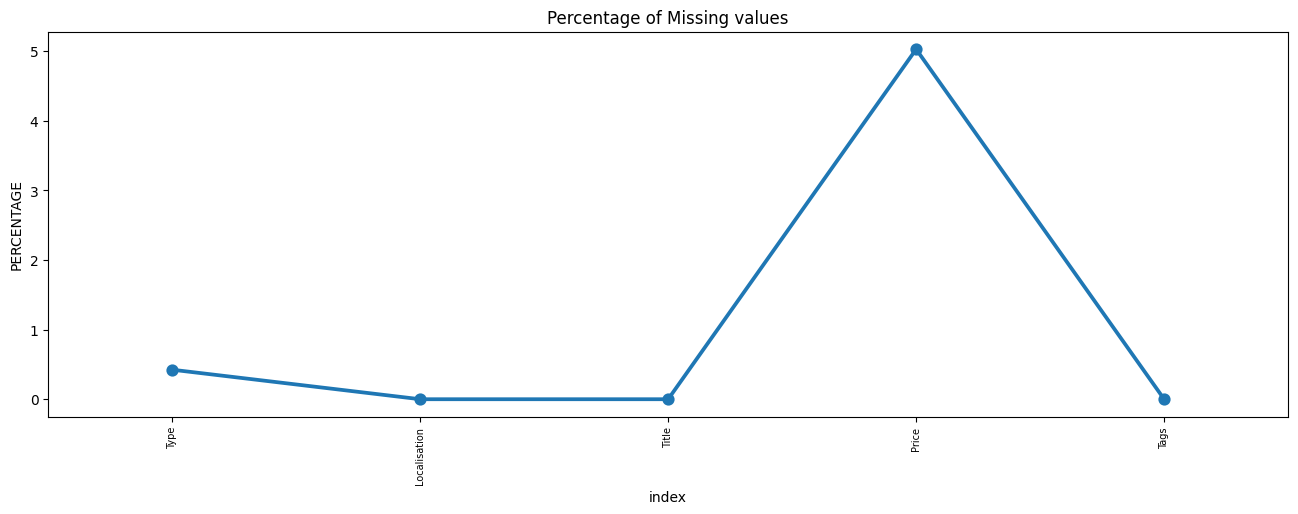

In [22]:
def showmissing(df):
    missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)  # Utiliser 'missing['index']' pour l'axe x
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()
showmissing(df)

In [23]:
df.isna().sum()

Type             14
Localisation      0
Title             0
Price           166
Tags              0
dtype: int64

In [24]:
df.dtypes 

Type            object
Localisation    object
Title           object
Price           object
Tags            object
dtype: object

In [25]:
df.sample(5) 

,Type,Localisation,Title,Price,Tags
1647,Appartements Casablanca,Palmier à Casablanca,Appartement de 268 m² a vendre à palmier,3 980 000 DH,"['268 m²', '7 Pièces', '3 Chambres', '2 Salles..."
1794,Villas & maisons de luxe Casablanca,Californie à Casablanca,Villa à vendre à californie,16 000 000 DH,"['1100 m²', '8 Pièces', '5 Chambres', '4 Salle..."
1164,Appartements Casablanca,Les Hôpitaux à Casablanca,Vente appartement de 245m 4 chambres 2 mars,3 600 000 DH,"['245 m²', '6 Pièces', '4 Chambres', '2 Salles..."
2627,Appartements Casablanca,Ain Chock à Casablanca,Appartement à vendre à Ain Chock,660 000 DH,"['65 m²', '2 Pièces', '2 Chambres', '1 Salle d..."
1490,Appartements Casablanca,Casablanca Finance City à Casablanca,"Appartement F2 de 59m² en vente, Ryad' Anfa",1 250 000 DH,"['59 m²', '1 Chambre', '1 Salle de bain']"


In [26]:
# Nombre d'éléments uniques dans chaque colonne du DataFrame df
df.nunique()

Type               4
Localisation     109
Title           1703
Price            575
Tags            1713
dtype: int64

In [27]:
# Description statistique du DataFrame df, incluant toutes les colonnes
df.describe().round()

,Type,Localisation,Title,Price,Tags
count,3286,3300,3300,3134,3300
unique,4,109,1703,575,1713
top,Appartements Casablanca,Californie à Casablanca,Appartement de 59m² en vente Résidence Les Pal...,2 500 000 DH,"['110 m²', '4 Pièces', '3 Chambres', '1 Salle ..."
freq,2468,358,11,55,9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3286 non-null   object
 1   Localisation  3300 non-null   object
 2   Title         3300 non-null   object
 3   Price         3134 non-null   object
 4   Tags          3300 non-null   object
dtypes: object(5)
memory usage: 129.0+ KB


In [29]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print(f"\nSize of DataFrame: {df.size}")
    print(f"\nFeatures: {df.columns.tolist()}")
    print("\nMissing values:", df.isnull().sum().values.sum())
    print(f"\nUnique values and types of Features:\n{ df.nunique() }")
    print("\nDescriptive Statistics:")
    print(df.describe().transpose())
    
    # Distribution des valeurs pour chaque colonne
    print("\nValue Distribution:")
    for col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True))
    
    # Valeurs les plus fréquentes pour chaque colonne
    print("\nMost Common Values:")
    for col in df.columns:
        print(f"\n{col}:")
        print(df[col].mode())
    
    # Histogrammes pour visualiser la distribution des données numériques
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(figsize=(12, 8))
        plt.suptitle('Histograms of Numeric Features')
        plt.show()

# Exemple d'utilisation :
dataoverview(df, "A Overview about the train dataset")

A Overview about the train dataset:

Rows: 3300

Number of features: 5

Size of DataFrame: 16500

Features: ['Type', 'Localisation', 'Title', 'Price', 'Tags']

Missing values: 180

Unique values and types of Features:
Type               4
Localisation     109
Title           1703
Price            575
Tags            1713
dtype: int64

Descriptive Statistics:
             count unique                                                top  \
Type          3286      4                            Appartements Casablanca   
Localisation  3300    109                            Californie à Casablanca   
Title         3300   1703  Appartement de 59m² en vente Résidence Les Pal...   
Price         3134    575                                       2 500 000 DH   
Tags          3300   1713  ['110 m²', '4 Pièces', '3 Chambres', '1 Salle ...   

              freq  
Type          2468  
Localisation   358  
Title           11  
Price           55  
Tags             9  

Value Distribution:

Type:
Type

In [30]:
df[df['Type'].isna()] 

,Type,Localisation,Title,Price,Tags
847,NaN,Les princesses à Casablanca,Appartement de 42m² en vente MAYFAIR RÉSIDENCE,980 000 DH,"['42 m²', '2 Pièces', '1 Chambre', '1 Salle de..."
865,NaN,Californie à Casablanca,Appartement Rez-de-jardin de 251m² en vente UT...,2 769 720 DH,"['251 m²', '4 Pièces', '3 Chambres', '2 Salles..."
906,NaN,Oasis à Casablanca,Top Appartement à vendre à l'oasis sans vis à,1 550 000 DH,"['84 m²', '4 Pièces', '2 Chambres', '2 Salles ..."
969,NaN,Casablanca Finance City à Casablanca,"Appartement F4 de 124m² en vente, Ryad' Anfa",2 200 000 DH,"['124 m²', '3 Chambres', '2 Salles de bains']"
1068,NaN,El Manar - El Hank à Casablanca,"Appartement de 82m² en vente, Les terrasses d'...",NaN,"['82 m²', '3 Pièces', '2 Chambres', '2 Salles ..."
1229,NaN,El Manar - El Hank à Casablanca,Appartement de 106m² en vente Les Terrasses d'...,NaN,"['106 m²', '4 Pièces', '3 Chambres', '2 Salles..."
1981,NaN,Californie à Casablanca,Villa de 1200 m2 à Californie,12 000 000 DH,"['1200 m²', '9 Pièces', '4 Chambres', '3 Salle..."
2084,NaN,Californie à Casablanca,Villa Commerciale de 1350 m2 à Bd La Mecque,16 000 000 DH,"['1350 m²', '7 Pièces', '4 Chambres', '2 Salle..."
2346,NaN,Burger à Casablanca,Bel appartement à vendre sur Bd Ghandi,2 600 000 DH,"['169 m²', '4 Pièces', '2 Chambres', '2 Salles..."
2366,NaN,Anassi à Casablanca,Appartement en vente à Anassi. 4 grandes pièces.,640 000 DH,"['98 m²', '4 Pièces', '4 Chambres', '2 Salles ..."


## Nettoyage des données

##### __Type__

In [31]:
df['Type'] = df['Type'].apply(lambda x: str(x).split(' ')[0])
df.sample()

,Type,Localisation,Title,Price,Tags
2542,Appartements,Les Hôpitaux à Casablanca,Quartier les hôpitaux vente appartement terrasse,2 100 000 DH,"['189 m²', '5 Pièces', '3 Chambres', '2 Salles..."


In [32]:
df['Type'].unique()

array(['Appartements', 'Villas', 'Riad', 'Maisons', 'nan'], dtype=object)

In [33]:
df = df.replace('nan',np.nan)

In [34]:
df[df['Type'].isna()] 

,Type,Localisation,Title,Price,Tags
847,NaN,Les princesses à Casablanca,Appartement de 42m² en vente MAYFAIR RÉSIDENCE,980 000 DH,"['42 m²', '2 Pièces', '1 Chambre', '1 Salle de..."
865,NaN,Californie à Casablanca,Appartement Rez-de-jardin de 251m² en vente UT...,2 769 720 DH,"['251 m²', '4 Pièces', '3 Chambres', '2 Salles..."
906,NaN,Oasis à Casablanca,Top Appartement à vendre à l'oasis sans vis à,1 550 000 DH,"['84 m²', '4 Pièces', '2 Chambres', '2 Salles ..."
969,NaN,Casablanca Finance City à Casablanca,"Appartement F4 de 124m² en vente, Ryad' Anfa",2 200 000 DH,"['124 m²', '3 Chambres', '2 Salles de bains']"
1068,NaN,El Manar - El Hank à Casablanca,"Appartement de 82m² en vente, Les terrasses d'...",NaN,"['82 m²', '3 Pièces', '2 Chambres', '2 Salles ..."
1229,NaN,El Manar - El Hank à Casablanca,Appartement de 106m² en vente Les Terrasses d'...,NaN,"['106 m²', '4 Pièces', '3 Chambres', '2 Salles..."
1981,NaN,Californie à Casablanca,Villa de 1200 m2 à Californie,12 000 000 DH,"['1200 m²', '9 Pièces', '4 Chambres', '3 Salle..."
2084,NaN,Californie à Casablanca,Villa Commerciale de 1350 m2 à Bd La Mecque,16 000 000 DH,"['1350 m²', '7 Pièces', '4 Chambres', '2 Salle..."
2346,NaN,Burger à Casablanca,Bel appartement à vendre sur Bd Ghandi,2 600 000 DH,"['169 m²', '4 Pièces', '2 Chambres', '2 Salles..."
2366,NaN,Anassi à Casablanca,Appartement en vente à Anassi. 4 grandes pièces.,640 000 DH,"['98 m²', '4 Pièces', '4 Chambres', '2 Salles ..."


In [35]:
missing_type = df['Type'].isna()[df['Type'].isna()].index
missing_type

Index([847, 865, 906, 969, 1068, 1229, 1981, 2084, 2346, 2366, 2473, 2554,
       2833, 2868],
      dtype='int64')

In [36]:
for idx in missing_type:
    title = df.loc[idx, 'Title']
    if isinstance(title, str):
        title_lower = title.lower()
        if 'appartement' in title_lower:
            df.loc[idx, 'Type'] = 'Appartements'
        if 'villa' in title_lower:
            df.loc[idx, 'Type'] = 'Villas'
        if 'maison' in title_lower:
            df.loc[idx, 'Type'] = 'Maisons'
        if 'riad' in title_lower:
            df.loc[idx, 'Type'] = 'Riad'


In [37]:
df[df['Type'].isna()]

,Type,Localisation,Title,Price,Tags


In [38]:
df.dropna(subset='Type',inplace=True)
df.isna().sum() 

Type              0
Localisation      0
Title             0
Price           166
Tags              0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3300 non-null   object
 1   Localisation  3300 non-null   object
 2   Title         3300 non-null   object
 3   Price         3134 non-null   object
 4   Tags          3300 non-null   object
dtypes: object(5)
memory usage: 129.0+ KB


##### __localisation and City__

In [40]:
def extract_city(localisation): 
    return localisation.split('à')[-1].strip() 
df['City'] = df['Localisation'].apply(extract_city) 
df['Localisation'] = df['Localisation'].apply(lambda x: x.split('à')[0]) 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3300 non-null   object
 1   Localisation  3300 non-null   object
 2   Title         3300 non-null   object
 3   Price         3134 non-null   object
 4   Tags          3300 non-null   object
 5   City          3300 non-null   object
dtypes: object(6)
memory usage: 154.8+ KB


In [41]:
df.sample()

,Type,Localisation,Title,Price,Tags,City
2776,Appartements,Maârif Extension,Appt a vendre a biranzarran sup 126 m hab 3 ch,1 850 000 DH,"['126 m²', '4 Pièces', '3 Chambres', '2 Salles...",Casablanca


In [42]:
df['City'].value_counts()

City
Casablanca    3300
Name: count, dtype: int64

##### __Price__

In [43]:
df['Price'] = df['Price'].str.replace(r'\s+|DH|EUR', '', regex=True)
df['Price'] = pd.to_numeric(df.Price, errors='coerce')
df.sample(5)

,Type,Localisation,Title,Price,Tags,City
2202,Appartements,Val Fleury,Val fleury vente bel appartement balcon 210 m²,3000000.0,"['210 m²', '4 Pièces', '3 Chambres', '3 Salles...",Casablanca
1664,Villas,Californie,"Villa à vendre, Californie",16500000.0,"['1260 m²', '10 Pièces', '4 Chambres', '4 Sall...",Casablanca
266,Villas,Californie,Vente D’une Magnifique Villa à Californie,16000000.0,"['1076 m²', '6 Pièces', '5 Chambres', '6 Salle...",Casablanca
1289,Appartements,Gauthier,Bel appartement à vendre à Gauthier. Surface d...,3000000.0,"['198 m²', '4 Pièces', '3 Chambres', '3 Salles...",Casablanca
721,Appartements,Oasis,Vendre studio F2 46 m2 Etage 3 Oasis Casablanca,1050000.0,"['46 m²', '2 Pièces', '1 Chambre', '1 Salle de...",Casablanca


In [44]:
df.isna().sum()

Type              0
Localisation      0
Title             0
Price           166
Tags              0
City              0
dtype: int64

In [45]:
avg_prices = df.groupby(['Type', 'City'])['Price'].mean().round()
df['Price'] = df.apply(lambda x: avg_prices[(x['Type'], x['City'])] if pd.isna(x['Price']) else x['Price'], axis=1)

In [46]:
df.isna().sum()

Type            0
Localisation    0
Title           0
Price           0
Tags            0
City            0
dtype: int64

In [47]:
df.duplicated(subset=['Type', 'Localisation', 'Title', 'Price', 'Tags', 'City'])
df = df.drop_duplicates(subset = ['Type', 'Localisation', 'Title', 'Price','Tags']).reset_index(drop= True)

##### __Tags__

In [48]:
df['Tags'] = df.Tags.apply(eval)
df.sample(3)

,Type,Localisation,Title,Price,Tags,City
1450,Appartements,Les princesses,Studios neufs à vendre,1000000.0,"[42 m², 2 Pièces, 1 Chambre, 1 Salle de bain, ...",Casablanca
570,Villas,Anfa Supérieur,Villa 2014m² à vendre vue sur mer Anfa Supérieur,48000000.0,"[2014 m², 1 Pièce, 1 Chambre, 1 Salle de bain,...",Casablanca
1186,Appartements,Oulfa,Lotissement ACHARAF 2 Imm 4 App 24 OULFA,1995968.0,"[46 m², 3 Pièces, 2 Chambres, 1 Salle de bain,...",Casablanca


In [49]:
df[df['Tags'].isna()]

,Type,Localisation,Title,Price,Tags,City


In [50]:
to_pop = []
for index, row in df.iterrows():
    tags = row['Tags']
    for t in range(len(tags)):
        if "m²" in tags[t]:
            df.loc[index, 'Area'] = tags[t]
            to_pop.append(t)
        if "Pièces" in tags[t] or "Pièce" in tags[t]:
            df.loc[index, 'Rooms'] = tags[t]
            to_pop.append(t)
        if "Chambres" in tags[t] or "Chambre" in tags[t]:
            df.loc[index, 'Bedrooms'] = tags[t]
            to_pop.append(t)
        if "Salles de bains" in tags[t] or "Salle de bain" in tags[t]:
            df.loc[index, 'Bathrooms'] = tags[t]
            to_pop.append(t)
        if "étage" in tags[t]:
            df.loc[index, 'Floor'] = tags[t]
            to_pop.append(t)

    Other_tags = list([tags[k] for k in range(len(tags)) if k not in to_pop])
    df.loc[index, 'Other_tags'] = str(Other_tags)

df.drop('Tags', axis=1, inplace=True)

In [51]:
df.sample(2)

,Type,Localisation,Title,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags
1537,Appartements,Racine,Magnifique Appartement Racine Etage Eleve,3400000.0,Casablanca,195 m²,4 Pièces,3 Chambres,2 Salles de bains,5ème étage,[]
166,Appartements,Californie,Appartement de 137m² en vente California Parc,2129100.0,Casablanca,137 m²,3 Pièces,2 Chambres,NaN,3ème étage,[]


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1771 non-null   object 
 1   Localisation  1771 non-null   object 
 2   Title         1771 non-null   object 
 3   Price         1771 non-null   float64
 4   City          1771 non-null   object 
 5   Area          1771 non-null   object 
 6   Rooms         1693 non-null   object 
 7   Bedrooms      1766 non-null   object 
 8   Bathrooms     1722 non-null   object 
 9   Floor         957 non-null    object 
 10  Other_tags    1771 non-null   object 
dtypes: float64(1), object(10)
memory usage: 152.3+ KB


##### __Floor__

In [53]:
df.loc[df[df['Type' ]!= 'Appartements'].index ,'Floor'] = 0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1771 non-null   object 
 1   Localisation  1771 non-null   object 
 2   Title         1771 non-null   object 
 3   Price         1771 non-null   float64
 4   City          1771 non-null   object 
 5   Area          1771 non-null   object 
 6   Rooms         1693 non-null   object 
 7   Bedrooms      1766 non-null   object 
 8   Bathrooms     1722 non-null   object 
 9   Floor         1369 non-null   object 
 10  Other_tags    1771 non-null   object 
dtypes: float64(1), object(10)
memory usage: 152.3+ KB


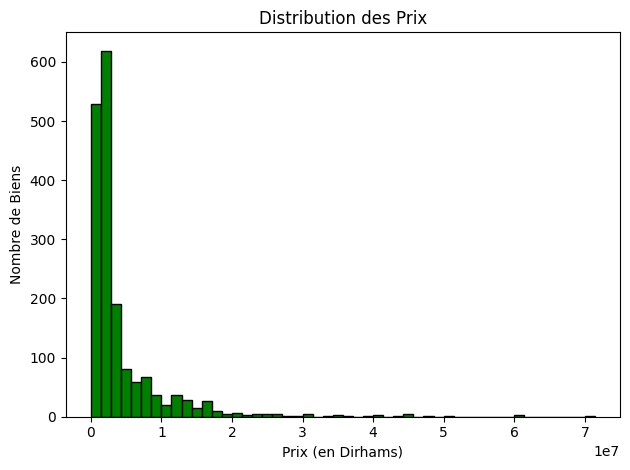

In [58]:
import matplotlib.pyplot as plt
# Distribution des prix 
plt.subplot(1, 1, 1)
plt.hist(df['Price'], bins=50, color='green', edgecolor='k')
plt.title('Distribution des Prix')
plt.xlabel('Prix (en Dirhams)')
plt.ylabel('Nombre de Biens')

plt.tight_layout()
plt.show()


In [59]:
df.sample(2) 

,Type,Localisation,Title,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags
1587,Appartements,Californie,Californie Luxueux 3 ch de 130m² balcon park,1725000.0,Casablanca,130 m²,5 Pièces,3 Chambres,2 Salles de bains,3ème étage,[]
987,Villas,Californie,Villa Commerciale de 1120 m2 à Bd Panoramique,15000000.0,Casablanca,1120 m²,8 Pièces,4 Chambres,3 Salles de bains,0,[]


In [60]:
def clean_numeric_column(column):
    column = column.str.replace(r'\D+', '', regex=True)
    column = column.astype('float')
    return column

In [61]:
to_numeric_column = ['Area','Rooms','Bedrooms','Bathrooms','Floor']

for col in to_numeric_column:
    df[col] = clean_numeric_column(df[col])

df.sample(3)

,Type,Localisation,Title,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags
1563,Appartements,Casablanca Finance City,Vente Duplex T5 neuf exceptionnel avec terrass...,6200000.0,Casablanca,257.0,5.0,4.0,3.0,1.0,[]
521,Villas,Casablanca,Villa proche frederic cassel,22500000.0,Casablanca,1230.0,NaN,7.0,6.0,NaN,[]
657,Appartements,Les princesses,Sublime Studio Ultra Moderne,1050000.0,Casablanca,55.0,2.0,1.0,1.0,3.0,[]


In [62]:
df.isna().sum()

Type              0
Localisation      0
Title             0
Price             0
City              0
Area              0
Rooms            78
Bedrooms          5
Bathrooms        49
Floor           814
Other_tags        0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1771 non-null   object 
 1   Localisation  1771 non-null   object 
 2   Title         1771 non-null   object 
 3   Price         1771 non-null   float64
 4   City          1771 non-null   object 
 5   Area          1771 non-null   float64
 6   Rooms         1693 non-null   float64
 7   Bedrooms      1766 non-null   float64
 8   Bathrooms     1722 non-null   float64
 9   Floor         957 non-null    float64
 10  Other_tags    1771 non-null   object 
dtypes: float64(6), object(5)
memory usage: 152.3+ KB


In [64]:
df.describe().round()

,Price,Area,Rooms,Bedrooms,Bathrooms,Floor
count,1771.0,1771.0,1693.0,1766.0,1722.0,957.0
mean,4337191.0,276.0,5.0,3.0,2.0,3.0
std,6641495.0,429.0,2.0,1.0,1.0,2.0
min,1600.0,30.0,1.0,1.0,1.0,1.0
25%,1250000.0,89.0,3.0,2.0,2.0,2.0
50%,2000000.0,129.0,4.0,3.0,2.0,3.0
75%,4200000.0,245.0,6.0,3.0,3.0,4.0
max,71400000.0,5400.0,17.0,18.0,10.0,20.0


A Overview about the train dataset:

Rows: 1771

Number of features: 11

Size of DataFrame: 19481

Features: ['Type', 'Localisation', 'Title', 'Price', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Other_tags']

Missing values: 946

Unique values and types of Features:
Type               4
Localisation     109
Title           1703
Price            578
City               1
Area             465
Rooms             17
Bedrooms          13
Bathrooms         10
Floor             14
Other_tags         9
dtype: int64

Descriptive Statistics:
            count          mean           std     min        25%        50%  \
Price      1771.0  4.337191e+06  6.641495e+06  1600.0  1250000.0  2000000.0   
Area       1771.0  2.762767e+02  4.294552e+02    30.0       89.0      129.0   
Rooms      1693.0  4.568813e+00  2.197575e+00     1.0        3.0        4.0   
Bedrooms   1766.0  2.908267e+00  1.340825e+00     1.0        2.0        3.0   
Bathrooms  1722.0  2.277003e+00  1.134958e+00     1.

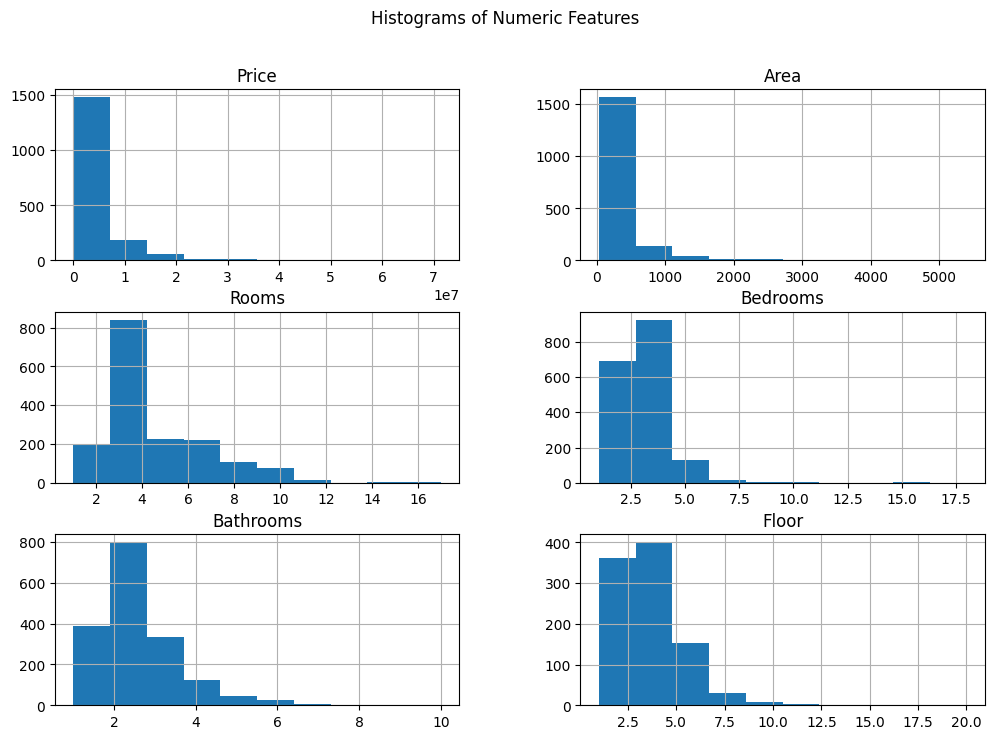

In [65]:
dataoverview(df, "A Overview about the train dataset")

##### __Other_tags__

In [66]:
df_exp =df.copy()

In [67]:
#Transform other tags type from string to list
df_exp['Other_tags'] = df_exp.Other_tags.apply(eval)

In [68]:
#Inpsect Other tags column's content

def to_1D(series):
    '''
    Transform list elements of a seriers into a single series of all entries
    '''
    return pd.Series([x for _list in series for x in _list])

#Check unique elements found in the Other tags lists
other_tags_unique = to_1D(df_exp.Other_tags).unique()
display(other_tags_unique)

#Check their frequency
other_tags_frq = to_1D(df_exp.Other_tags).value_counts()
display(other_tags_frq)

array(['Nouveau', "Moins d'un an", 'Bon état', '10-20 ans', '5-10 ans',
       '20-30 ans', '1-5 ans', 'À rénover'], dtype=object)

Bon état         38
Nouveau          31
10-20 ans         6
Moins d'un an     4
5-10 ans          3
À rénover         3
1-5 ans           2
20-30 ans         1
Name: count, dtype: int64

In [69]:
#Split frequency table according to the two variables
current_state_tags = ['Nouveau', 'Bon état', 'À rénover']
current_state_tag_freq = other_tags_frq[current_state_tags]
# ,'20-30 ans','30-50 ans','50-70 ans'
age_tags = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans']
age_tag_freq = other_tags_frq[age_tags]

In [70]:
def to_var(list_of_tags, var_tags):
    for tag in var_tags:
        if tag in list_of_tags:
            return tag
    else:
        return np.nan

df_exp = df_exp.copy()
df_exp['Current_state'] = df_exp.Other_tags.apply(lambda x: to_var(x,current_state_tags))
df_exp['Age'] = df_exp.Other_tags.apply(lambda x: to_var(x,age_tags))
df.drop(columns=['Other_tags'],inplace=True)
display(df.sample(2))
display(df_exp.sample(2))
df = df_exp.copy()

,Type,Localisation,Title,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor
1350,Appartements,Foncière,Superbe appartement à vendre à Foncière. 3 cha...,1995968.0,Casablanca,173.0,4.0,3.0,2.0,5.0
1734,Appartements,Bourgogne Ouest,Superbe appartement à 120m²,1500000.0,Casablanca,120.0,7.0,3.0,1.0,3.0


,Type,Localisation,Title,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Current_state,Age
1512,Appartements,Roches Noires,Appartement a vendre roche noir,800000.0,Casablanca,107.0,2.0,2.0,1.0,NaN,[],NaN,NaN
623,Appartements,Mers Sultan,Vente d'un bel appartement à Mers Sultan. Supe...,1995968.0,Casablanca,107.0,5.0,3.0,2.0,NaN,[],NaN,NaN


In [71]:
df.isna().sum()

Type                0
Localisation        0
Title               0
Price               0
City                0
Area                0
Rooms              78
Bedrooms            5
Bathrooms          49
Floor             814
Other_tags          0
Current_state    1699
Age              1756
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           1771 non-null   object 
 1   Localisation   1771 non-null   object 
 2   Title          1771 non-null   object 
 3   Price          1771 non-null   float64
 4   City           1771 non-null   object 
 5   Area           1771 non-null   float64
 6   Rooms          1693 non-null   float64
 7   Bedrooms       1766 non-null   float64
 8   Bathrooms      1722 non-null   float64
 9   Floor          957 non-null    float64
 10  Other_tags     1771 non-null   object 
 11  Current_state  72 non-null     object 
 12  Age            15 non-null     object 
dtypes: float64(6), object(7)
memory usage: 180.0+ KB


In [73]:
df.replace('', np.nan,inplace=True)

In [74]:
df['Age'] = df['Age'].fillna('Non Specifique')
df['Current_state'] = df['Current_state'].fillna('Non Specifique')

In [75]:
df_og =df.copy()
df['Price_m2'] = df_og['Price']/df_og['Area']

In [76]:
df_og.to_csv('../data/data_clean.csv',index=False)

In [77]:
df.shape

(1771, 14)

## Feature Engineering

In [79]:
df.drop(columns=['Title','Price_m2','Other_tags'],inplace=True)

In [80]:
df.isna().sum()

Type               0
Localisation       0
Price              0
City               0
Area               0
Rooms             78
Bedrooms           5
Bathrooms         49
Floor            814
Current_state      0
Age                0
dtype: int64

In [81]:
df.loc[df[df['Type' ]!= 'Appartements'].index ,'Floor'] = 0

In [82]:
#  8 étant le nombre total de colonnes dans votre DataFrame
df.dropna(thresh=9,inplace=True)
df.isna().sum()

Type               0
Localisation       0
Price              0
City               0
Area               0
Rooms             73
Bedrooms           0
Bathrooms         44
Floor            401
Current_state      0
Age                0
dtype: int64

In [83]:
df[df['Bedrooms'].isna()]

,Type,Localisation,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age


In [85]:
df.dropna(thresh=10,inplace=True)
df.isna().sum()

Type             0
Localisation     0
Price            0
City             0
Area             0
Rooms            0
Bedrooms         0
Bathrooms        0
Floor            0
Current_state    0
Age              0
dtype: int64

In [86]:
df.fillna(0, inplace=True)

In [87]:
df = df.dropna().reset_index(drop=True)

In [88]:
df.sample()

,Type,Localisation,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
466,Appartements,Palmier,2420000.0,Casablanca,110.0,1.0,3.0,1.0,5.0,Non Specifique,Non Specifique


In [89]:
df.to_csv('../data/final_data.csv',index=False)

In [90]:
df= pd.read_csv("../data/final_data.csv")

In [91]:
df.head()

,Type,Localisation,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
0,Appartements,Casablanca Finance City,22000.0,Casablanca,219.0,4.0,3.0,3.0,11.0,Nouveau,Moins d'un an
1,Appartements,Anfa,1230000.0,Casablanca,86.0,3.0,2.0,2.0,1.0,Bon état,10-20 ans
2,Appartements,La Gironde,900000.0,Casablanca,86.0,3.0,2.0,1.0,5.0,Bon état,10-20 ans
3,Appartements,Bourgogne Ouest,2400000.0,Casablanca,180.0,5.0,3.0,3.0,3.0,Bon état,10-20 ans
4,Appartements,Les princesses,1550000.0,Casablanca,120.0,5.0,3.0,2.0,5.0,Bon état,5-10 ans


In [92]:
df.describe().round()

,Price,Area,Rooms,Bedrooms,Bathrooms,Floor
count,1766.0,1766.0,1766.0,1766.0,1766.0,1766.0
mean,4315755.0,276.0,4.0,3.0,2.0,2.0
std,6632544.0,430.0,2.0,1.0,1.0,2.0
min,1600.0,30.0,0.0,1.0,0.0,0.0
25%,1250000.0,89.0,3.0,2.0,2.0,0.0
50%,1995968.0,128.0,4.0,3.0,2.0,1.0
75%,4100000.0,244.0,5.0,3.0,3.0,3.0
max,71400000.0,5400.0,17.0,18.0,10.0,20.0


            Price    Area   Rooms  Bedrooms  Bathrooms   Floor
count      1766.0  1766.0  1766.0    1766.0     1766.0  1766.0
mean    4315755.0   276.0     4.0       3.0        2.0     2.0
std     6632544.0   430.0     2.0       1.0        1.0     2.0
min        1600.0    30.0     0.0       1.0        0.0     0.0
25%     1250000.0    89.0     3.0       2.0        2.0     0.0
50%     1995968.0   128.0     4.0       3.0        2.0     1.0
75%     4100000.0   244.0     5.0       3.0        3.0     3.0
max    71400000.0  5400.0    17.0      18.0       10.0    20.0


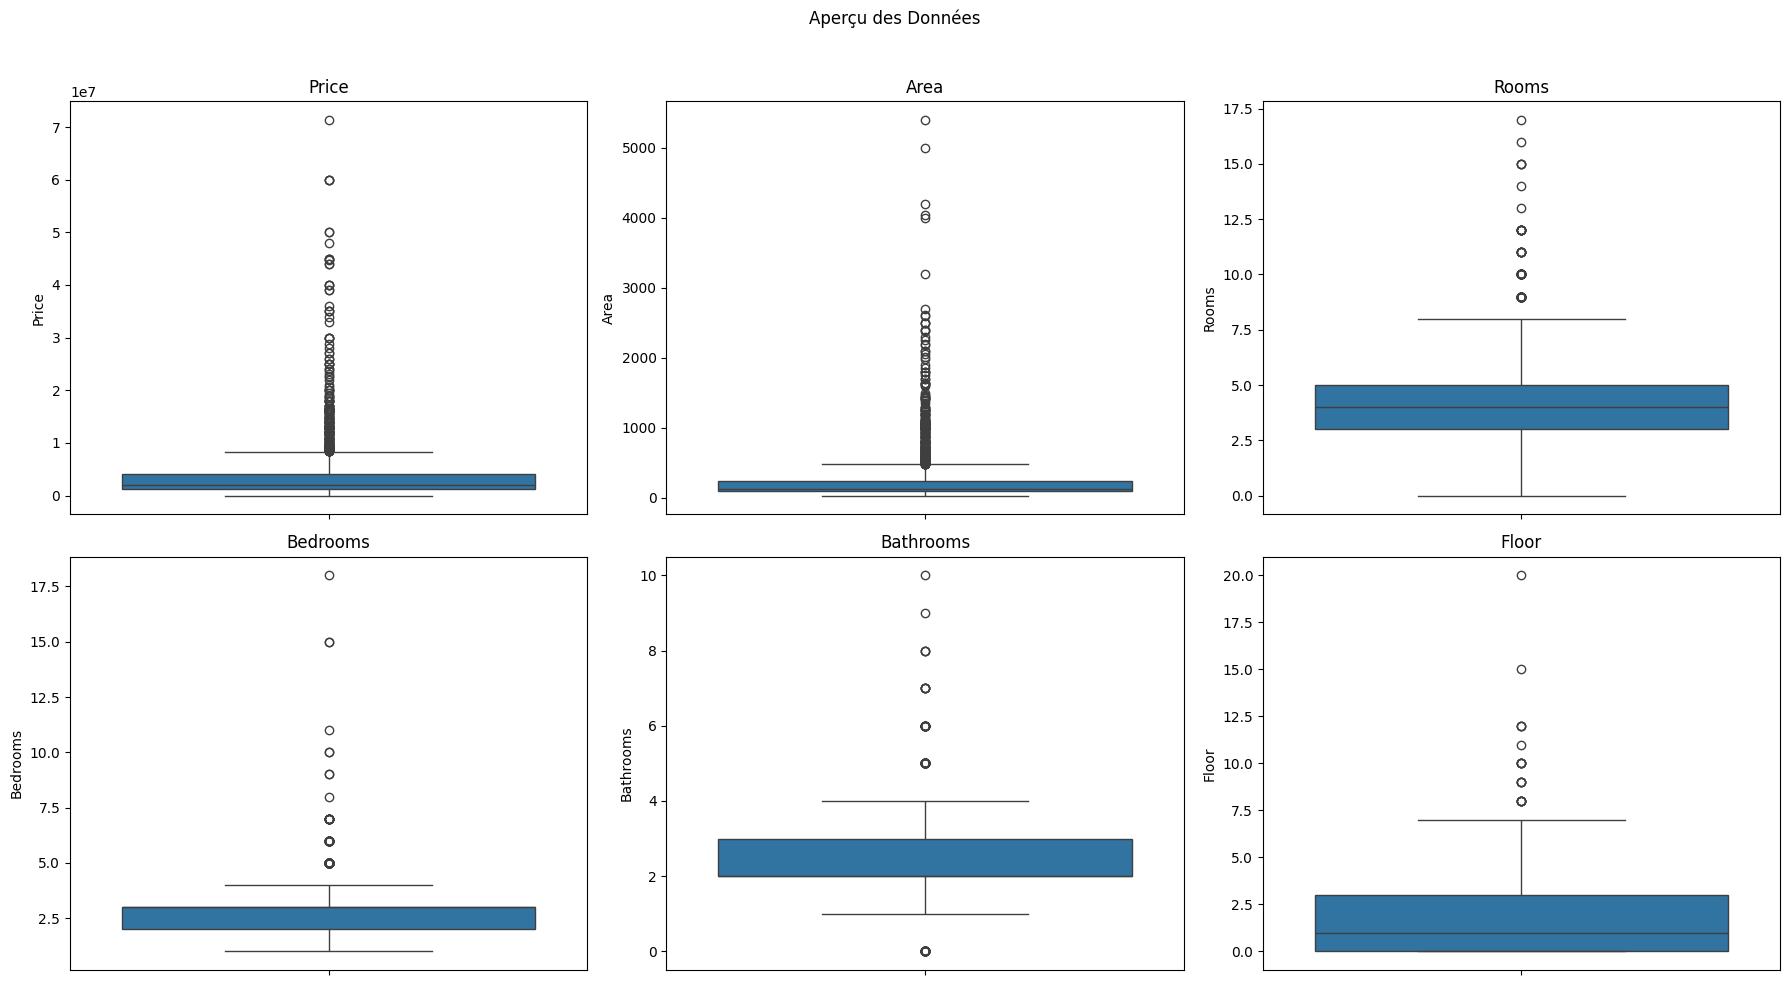

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistiques descriptives des données
data = {
    "Price": [1766, 4315755.0, 6632544.0, 1600.0, 1250000.0, 1995968.0, 4100000.0, 71400000.0],
    "Area": [1766, 276.0, 430.0, 30.0, 89.0, 128.0, 244.0, 5400.0],
    "Rooms": [1766, 4.0, 2.0, 0.0, 3.0, 4.0, 5.0, 17.0],
    "Bedrooms": [1766, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0, 18.0],
    "Bathrooms": [1766, 2.0, 1.0, 0.0, 2.0, 2.0, 3.0, 10.0],
    "Floor": [1766, 2.0, 2.0, 0.0, 0.0, 1.0, 3.0, 20.0]
}

df_stats = pd.DataFrame(data, index=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])

# Affichage des statistiques descriptives
print(df_stats)

# Visualisation des statistiques descriptives
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Aperçu des Données')

# Plotting boxplots for each variable
variables = ["Price", "Area", "Rooms", "Bedrooms", "Bathrooms", "Floor"]
for i, var in enumerate(variables):
    sns.boxplot(ax=axes[i//3, i%3], data=df, y=var)
    axes[i//3, i%3].set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [95]:
df.shape 

(1766, 11)

In [96]:
df.dtypes

Type              object
Localisation      object
Price            float64
City              object
Area             float64
Rooms            float64
Bedrooms         float64
Bathrooms        float64
Floor            float64
Current_state     object
Age               object
dtype: object

### selected feature names

In [97]:
def get_selected_feature_names(df,k=10):
    X = df.drop(columns = "Price")
    y = df["Price"]
    categorical_columns = X.select_dtypes(include=['object']).columns
    if not categorical_columns.empty:
        X_encoded = X.copy()
        encoder = LabelEncoder()
        for col in categorical_columns:
            X_encoded[col] = encoder.fit_transform(X[col])
    else:
        X_encoded = X
    
    selected_features = SelectKBest(chi2, k=k)
    
    selected_features.fit(X_encoded, y)
    
    selected_mask = selected_features.get_support()
    selected_feature_names = X.columns[selected_mask]
    
    return list(selected_feature_names)


In [98]:
selected_feature_names = get_selected_feature_names(df,k=8)
# df = df[selected_feature_names + ['Price']]
print(selected_feature_names)

['Type', 'Localisation', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state']


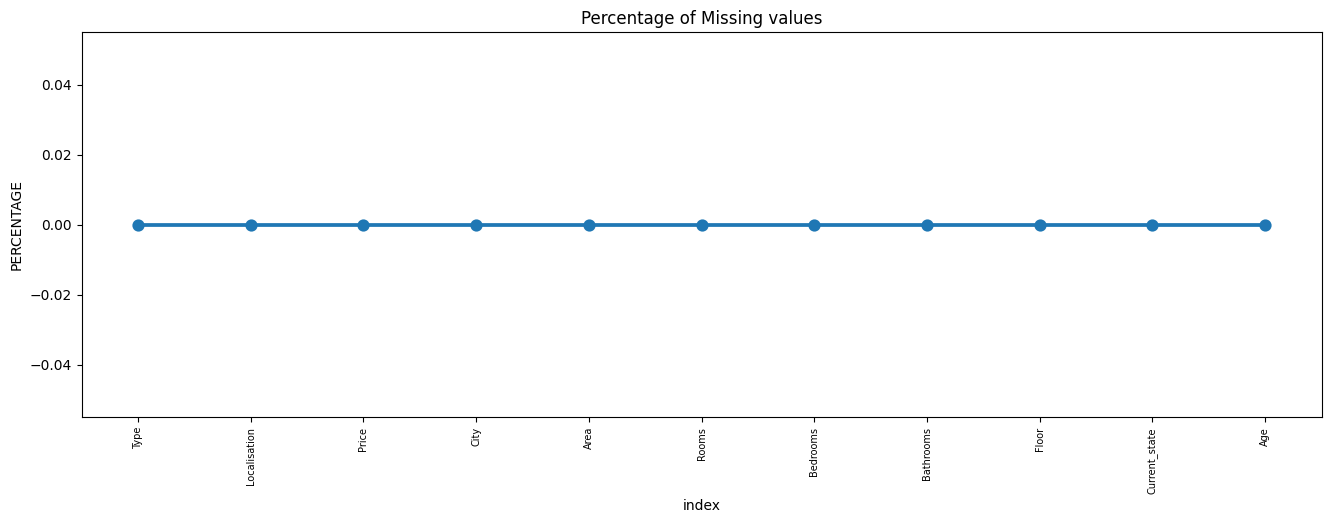

In [99]:
showmissing(df)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           1766 non-null   object 
 1   Localisation   1766 non-null   object 
 2   Price          1766 non-null   float64
 3   City           1766 non-null   object 
 4   Area           1766 non-null   float64
 5   Rooms          1766 non-null   float64
 6   Bedrooms       1766 non-null   float64
 7   Bathrooms      1766 non-null   float64
 8   Floor          1766 non-null   float64
 9   Current_state  1766 non-null   object 
 10  Age            1766 non-null   object 
dtypes: float64(6), object(5)
memory usage: 151.9+ KB


###  Label Encoding for Categorical Columns

In [101]:
def preprocess_data(df):
    # Exclure la colonne "Price" pour le prétraitement
    df_without_Price = df.drop(columns=['Price'])
    
    categorical_cols = df_without_Price.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df_without_Price[col] = le.fit_transform(df_without_Price[col])
        label_encoders[col] = le
    
    scaler = StandardScaler()
    numeric_cols = df_without_Price.select_dtypes(include=['int64', 'float64']).columns
    df_without_Price[numeric_cols] = scaler.fit_transform(df_without_Price[numeric_cols])
    
    return df_without_Price, label_encoders, scaler

df_processed, label_encoders, scaler = preprocess_data(df)

df_processed['Price'] = df['Price']
df = df_processed.copy()
# with open('../models/label_encoders_and_scaler.pkl', 'wb') as f:
#     pickle.dump((label_encoders, scaler), f)

df.head()


,Type,Localisation,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age,Price
0,0,26,0,-0.132091,-0.162693,0.068434,0.663445,4.344658,2,3,22000.0
1,0,12,0,-0.441808,-0.590882,-0.677586,-0.187422,-0.348678,0,1,1230000.0
2,0,70,0,-0.441808,-0.590882,-0.677586,-1.038289,1.528656,0,1,900000.0
3,0,21,0,-0.222910,0.265497,0.068434,0.663445,0.589989,0,1,2400000.0
4,0,75,0,-0.362632,0.265497,0.068434,-0.187422,1.528656,0,2,1550000.0


In [102]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Type,1766.0,0.65,1.22,0.00,0.00,0.00,0.00,3.00
Localisation,1766.0,53.31,34.15,0.00,23.00,52.00,86.00,108.00
City,1766.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Area,1766.0,-0.00,1.00,-0.57,-0.43,-0.34,-0.07,11.93
Rooms,1766.0,-0.00,1.00,-1.88,-0.59,-0.16,0.27,5.40
Bedrooms,1766.0,-0.00,1.00,-1.42,-0.68,0.07,0.07,11.26
Bathrooms,1766.0,-0.00,1.00,-1.89,-0.19,-0.19,0.66,6.62
Floor,1766.0,-0.00,1.00,-0.82,-0.82,-0.35,0.59,8.57
Current_state,1766.0,1.00,0.21,0.00,1.00,1.00,1.00,3.00
Age,1766.0,3.98,0.24,0.00,4.00,4.00,4.00,4.00


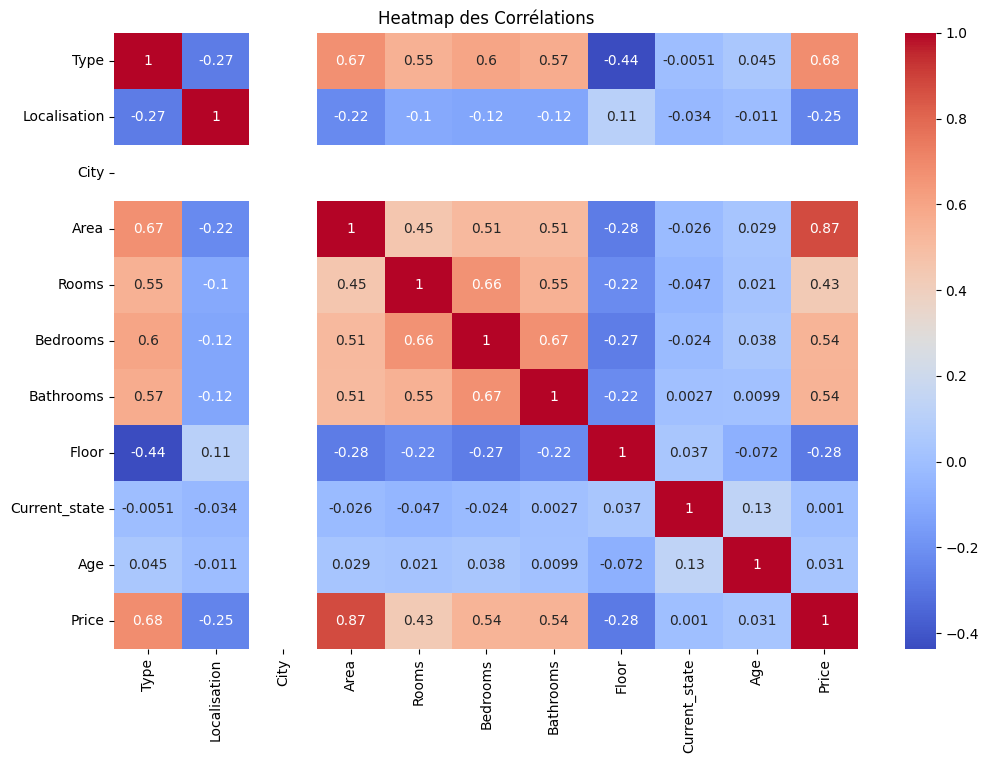

Price            1.000000
Area             0.873478
Type             0.680617
Bathrooms        0.543018
Bedrooms         0.535189
Rooms            0.431541
Age              0.031261
Current_state    0.001029
Localisation    -0.246108
Floor           -0.284842
City                  NaN
Name: Price, dtype: float64


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame contenant les données immobilières
# 'price' est la colonne cible, les autres sont les caractéristiques
correlation_matrix = df.corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap des Corrélations')
plt.show()

# Extraire les corrélations avec la cible 'price'
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlations)


In [103]:
for i in df.columns:  
    print(i,'Min value :', df[i].min(),'Max value :', df[i].max())

Type Min value : 0 Max value : 3
Localisation Min value : 0 Max value : 108
City Min value : 0 Max value : 0
Area Min value : -0.5722149914721052 Max value : 11.93289529717234
Rooms Min value : -1.8754504537461072 Max value : 5.403770428266256
Bedrooms Min value : -1.4236065660920674 Max value : 11.258742492429015
Bathrooms Min value : -1.8891550976763727 Max value : 6.619510810246285
Floor Min value : -0.818011790545772 Max value : 8.56866021792618
Current_state Min value : 0 Max value : 3
Age Min value : 0 Max value : 4
Price Min value : 1600.0 Max value : 71400000.0


## Model Building

In [104]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
from math import ceil
import itertools


### Train Test Split

In [105]:
X = df.drop(columns = "Price")
y = df["Price"]
X.head()

,Type,Localisation,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
0,0,26,0,-0.132091,-0.162693,0.068434,0.663445,4.344658,2,3
1,0,12,0,-0.441808,-0.590882,-0.677586,-0.187422,-0.348678,0,1
2,0,70,0,-0.441808,-0.590882,-0.677586,-1.038289,1.528656,0,1
3,0,21,0,-0.222910,0.265497,0.068434,0.663445,0.589989,0,1
4,0,75,0,-0.362632,0.265497,0.068434,-0.187422,1.528656,0,2


In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### ``Linear regression``

In [107]:
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_linear=linear.predict(x_test)
print("Training Accuracy = ", linear.score(x_train, y_train))
print("Test Accuracy     = ", linear.score(x_test, y_test))

Training Accuracy =  0.7995608295864147
Test Accuracy     =  0.7388985952874217


### `` Decision Tree Regressor``

In [108]:
dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)
print("Training Accuracy = ", dt.score(x_train, y_train))
print("Test Accuracy     = ", dt.score(x_test, y_test))

Training Accuracy =  0.9991130263803863
Test Accuracy     =  0.687257581517054


### `` Ridge ``

In [109]:
ridge = Ridge(alpha=1.0)  
ridge.fit(x_train, y_train)

print("Training Accuracy = ", ridge.score(x_train, y_train))
print("Test Accuracy     = ", ridge.score(x_test, y_test))

Training Accuracy =  0.7995601917486614
Test Accuracy     =  0.7389859848021387


In [ ]:
def best_model_from_trained_models(trained_models, scores, metric='neg_mean_squared_error'):
    best_model = None
    best_score = float('-inf') if metric == 'neg_mean_squared_error' else float('inf')
    
    for model, score in zip(trained_models, scores):
        # Sélection du meilleur modèle
        if (metric == 'neg_mean_squared_error' and score > best_score) or \
           (metric != 'neg_mean_squared_error' and score < best_score):
            best_score = score
            best_model = model
    
    return best_model, best_score
best_model, best_score = best_model_from_trained_models(linear, linear.score(x_train, y_train))
print("Meilleur modèle:", best_model)
print("Score de performance:", best_score)


### `` Random Forest Regressor ``

In [113]:
rf = RandomForestRegressor(max_depth= None, min_samples_split= 2, n_estimators= 200)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
print("Training Accuracy = ", rf.score(x_train, y_train))
print("Test Accuracy     = ", rf.score(x_test, y_test))

Training Accuracy =  0.9676180750567397
Test Accuracy     =  0.7579129689982433


In [114]:
r2 = r2_score(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Coefficient de Détermination (R²): {r2}")
print(f"Erreur Quadratique Moyenne (RMSE): {rmse}")

Coefficient de Détermination (R²): 0.7579129689982433
Erreur Quadratique Moyenne (RMSE): 3603138.421615792


c:\Users\RPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=33) # 0.8141310419787519
# Creating Random Forest regressor
rf_reg = RandomForestRegressor(max_depth=None, min_samples_split=2, n_estimators=200)

# Fitting the model
rf_reg.fit(x_train, y_train)

# Predicting
y_pred = rf_reg.predict(x_test)

# Evaluation
print("Training Accuracy = ", rf_reg.score(x_train, y_train))
print("Test Accuracy     = ", rf_reg.score(x_test, y_test))


Training Accuracy =  0.966148564395036
Test Accuracy     =  0.8285607451500654


### ``KNN``

In [116]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)
print("Training Accuracy = ", knn.score(x_train, y_train))
print("Test Accuracy     = ", knn.score(x_test, y_test))

Training Accuracy =  0.823128773482417
Test Accuracy     =  0.7600779008877596


### ``XGBRegressor``

In [117]:
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xgb.fit(x_train, y_train)
y_pred_xgb=xgb.predict(x_test)
print("Training Accuracy = ", xgb.score(x_train, y_train))
print("Test Accuracy     = ", xgb.score(x_test, y_test))


Training Accuracy =  0.9474486843697184
Test Accuracy     =  0.7817566653351302


In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.12,random_state=33) 
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
print("Training Accuracy = ", xgb.score(x_train, y_train))
print("Test Accuracy     = ", xgb.score(x_test, y_test))


Training Accuracy =  0.9396806553359618
Test Accuracy     =  0.8707182098408669


In [121]:
# Example of using a robust regression model (RANSAC)
ransac = RANSACRegressor() 
ransac.fit(x_train, y_train) 
y_pred_ransac=ransac.predict(x_test)
print("Training Accuracy = ", ransac.score(x_train, y_train))
print("Test Accuracy     = ", ransac.score(x_test, y_test))

Training Accuracy =  0.715788352923449
Test Accuracy     =  0.7345250939519326


In [122]:
# Example of using Lasso (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(x_test)
print("Training Accuracy = ", lasso.score(x_train, y_train))
print("Test Accuracy     = ", lasso.score(x_test, y_test))

Training Accuracy =  0.7771736397123066
Test Accuracy     =  0.8754152593428339


Area             0.857636
Localisation     0.045263
Bathrooms        0.032777
Bedrooms         0.031783
Rooms            0.028695
Floor            0.001672
Type             0.001668
Current_state    0.000461
Age              0.000045
City             0.000000
dtype: float64


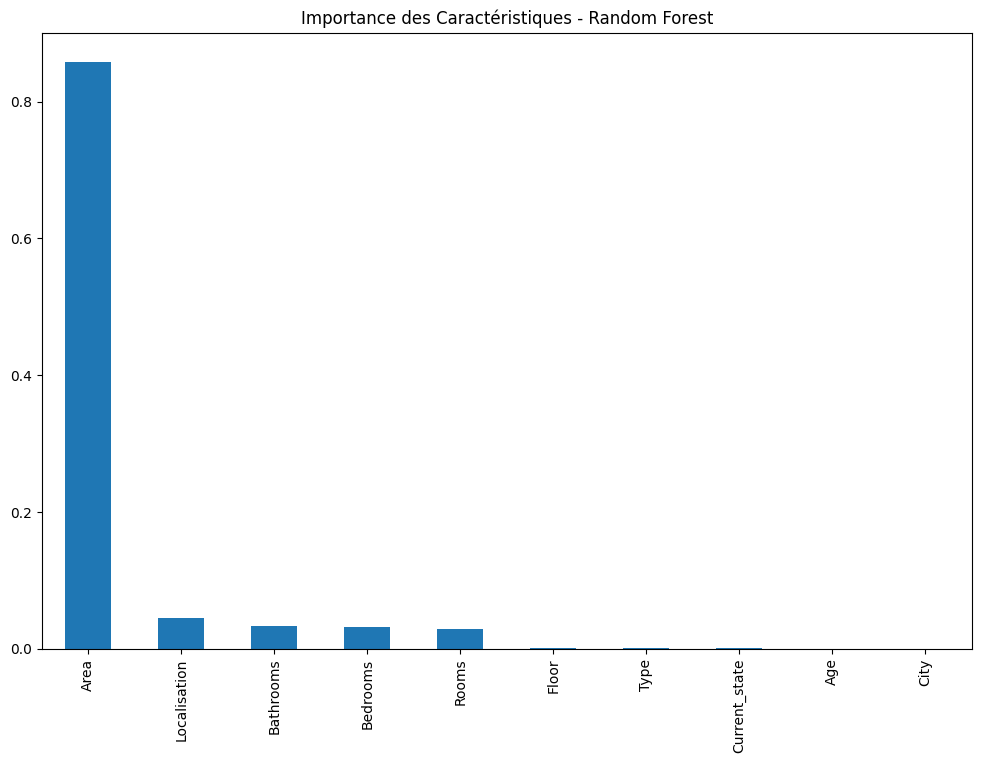

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Ajuster le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extraire les importances des caractéristiques
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_importances = rf_importances.sort_values(ascending=False)
print(rf_importances)

# Afficher les importances des caractéristiques
plt.figure(figsize=(12, 8))
rf_importances.plot(kind='bar')
plt.title('Importance des Caractéristiques - Random Forest')
plt.show()


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name, results):
    # Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Stockage des résultats
    results[model_name] = {'R²': r2, 'RMSE': rmse}



# Dictionnaire pour stocker les résultats
results = {}

# Évaluation de chaque modèle
evaluate_model(y_test, y_pred_linear, 'LinearRegression', results)
evaluate_model(y_test, y_pred_rf, 'RandomForestRegressor', results)
evaluate_model(y_test, y_pred_dt, 'DecisionTreeRegressor', results)
evaluate_model(y_test, y_pred_knn, 'KNeighborsRegressor', results)
evaluate_model(y_test, y_pred_xgb, 'XGBRegressor', results)
evaluate_model(y_test, y_pred_ransac, 'RANSACRegressor', results)
evaluate_model(y_test, y_pred_lasso, 'Lasso', results)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(results).T
results_df

# Visualisation des résultats sous forme de graphique
# plt.figure(figsize=(10, 6))
# sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
# plt.title('Évaluation des Modèles - Coefficient de Détermination (R²) et RMSE')
# plt.xlabel('Modèles')
# plt.ylabel('Valeur')
# plt.legend(title='Métriques')
# plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [212, 354]

##  Final Model Evaluation

In [126]:
def calculate_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

def plot_roc_curve(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def plot_precision_recall_curve(y_true, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    f1_score = 2 * (precision * recall) / (precision + recall)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

def plot_predictions_vs_actual(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs Actual')
    plt.show()


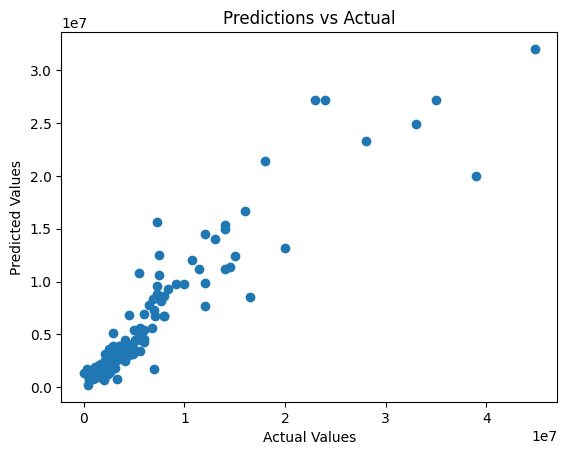

In [127]:
# y_pred => XGBRegressor 
plot_predictions_vs_actual(y_test,y_pred)

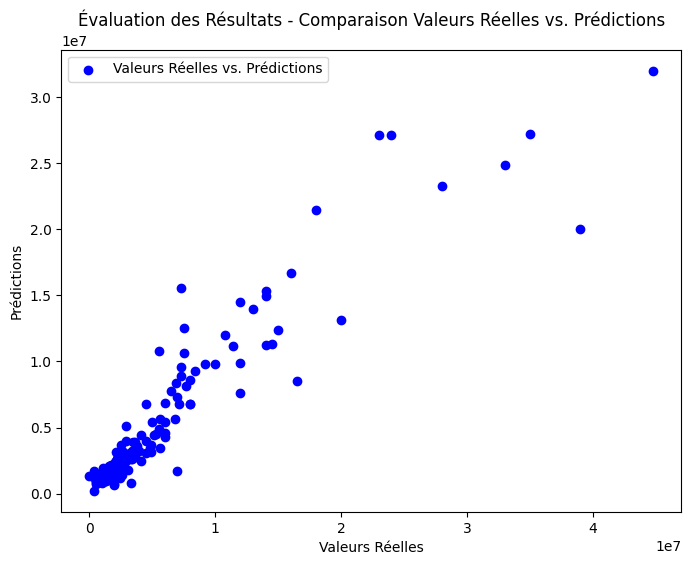

In [128]:
import matplotlib.pyplot as plt

# Comparaison des valeurs prédites et réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valeurs Réelles vs. Prédictions')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Évaluation des Résultats - Comparaison Valeurs Réelles vs. Prédictions')
plt.legend()
plt.show()

In [129]:
def get_best_model(x_test, y_test, models):
    best_model = None
    best_accuracy = -1
    for name, model in models.items():
        accuracy = model.score(x_test, y_test)
        print(f"{name} - Test Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
    print(f"\nThe best model is: {best_model.__class__.__name__} with Test Accuracy: {best_accuracy}")
    return best_model

# Utilisation de la fonction pour obtenir le meilleur modèle
best_model = get_best_model(x_test, y_test, {
    'Linear Regression': linear,
    'Decision Tree Regressor': dt,
    'Ridge Regression': ridge,
    'Random Forest Regressor': rf,
    'KNeighbors Regressor': knn,
    'XGBoost': xgb,
    'RANSAC Regressor': ransac,
    'Lasso': lasso
})


Linear Regression - Test Accuracy: 0.8792666056821727
Decision Tree Regressor - Test Accuracy: 0.9933695489363835
Ridge Regression - Test Accuracy: 0.8794089428913221
Random Forest Regressor - Test Accuracy: 0.9814978286516818
KNeighbors Regressor - Test Accuracy: 0.7992130217640042
XGBoost - Test Accuracy: 0.8707182098408669
RANSAC Regressor - Test Accuracy: 0.7345250939519326
Lasso - Test Accuracy: 0.8754152593428339

The best model is: DecisionTreeRegressor with Test Accuracy: 0.9933695489363835


ValueError: Found input variables with inconsistent numbers of samples: [212, 354]

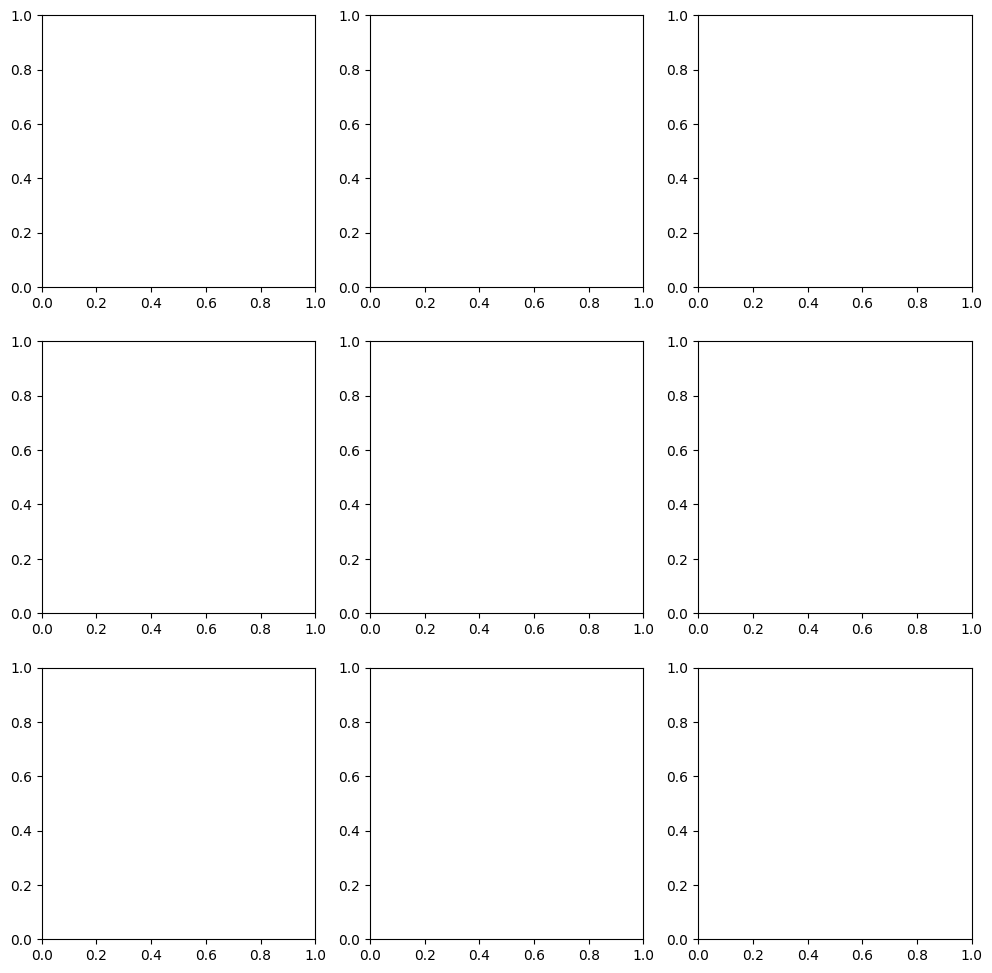

In [130]:
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Liste des modèles et de leurs prédictions
models = {
    "Linear Regression": y_pred_linear,
    "Random Forest Regressor": y_pred_rf,
    "Decision Tree Regressor": y_pred_dt,
    "KNeighbors Regressor": y_pred_knn,
    "XGB Regressor": y_pred_xgb,
    "RANSAC Regressor": y_pred_ransac,
    "Lasso": y_pred_lasso
}
# Création d'une figure pour les visualisations avec 3 lignes et 3 colonnes
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Itération à travers chaque modèle
for i, (model_name, y_pred) in enumerate(models.items()):
    # Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Affichage du graphique de dispersion des valeurs prédites vs valeurs réelles
    row = i // 4
    col = i % 2
    axs[row, col].scatter(y_test, y_pred, alpha=0.5)
    axs[row, col].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[row, col].set_xlabel('Valeurs Réelles')
    axs[row, col].set_ylabel('Prédictions')
    axs[row, col].set_title(f'{model_name}: Valeurs Réelles vs Prédictions\nR²={r2:.3f}, RMSE={rmse:.3f}')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


c:\Users\RPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\RPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

c:\Users\RPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



IndexError: index 3 is out of bounds for axis 1 with size 3

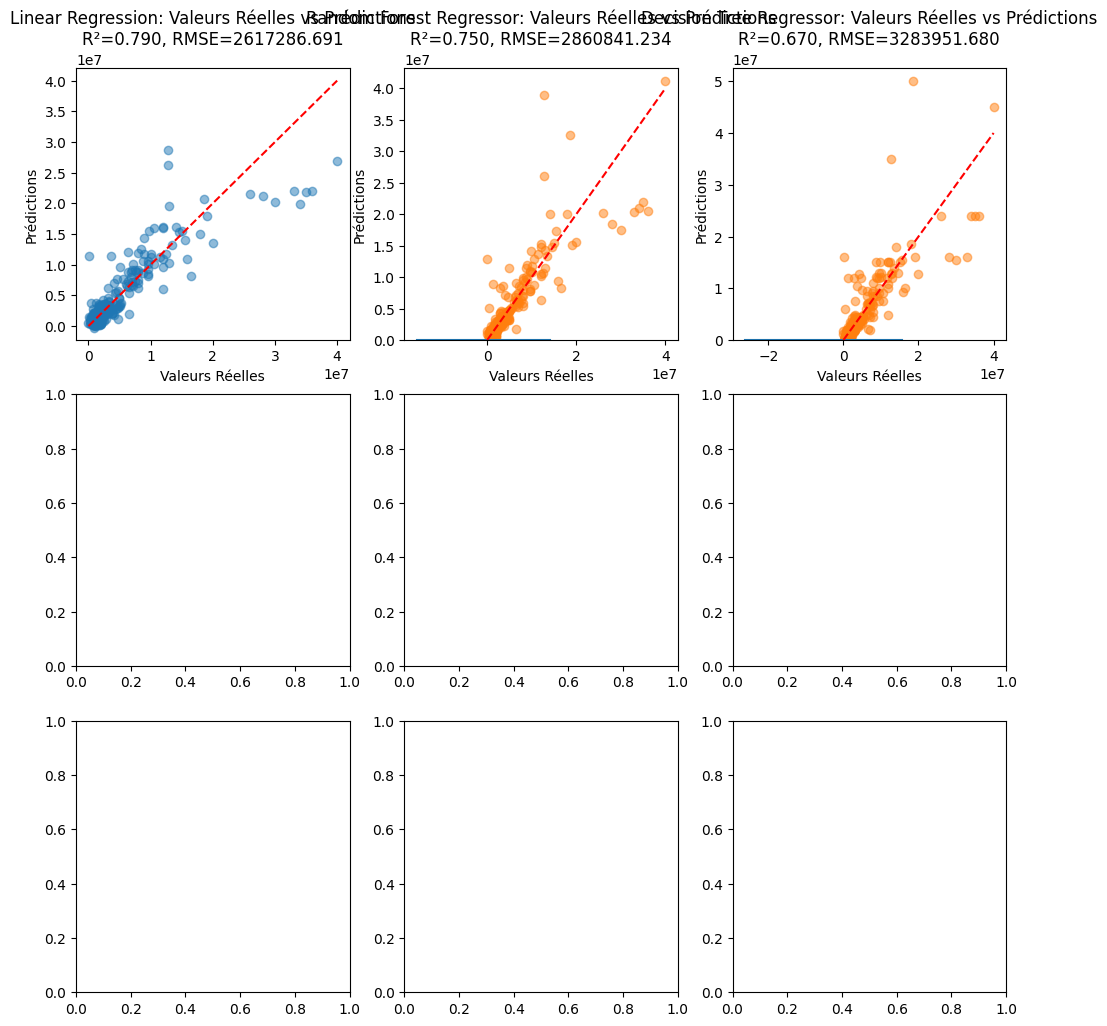

ValueError: Found input variables with inconsistent numbers of samples: [212, 354]

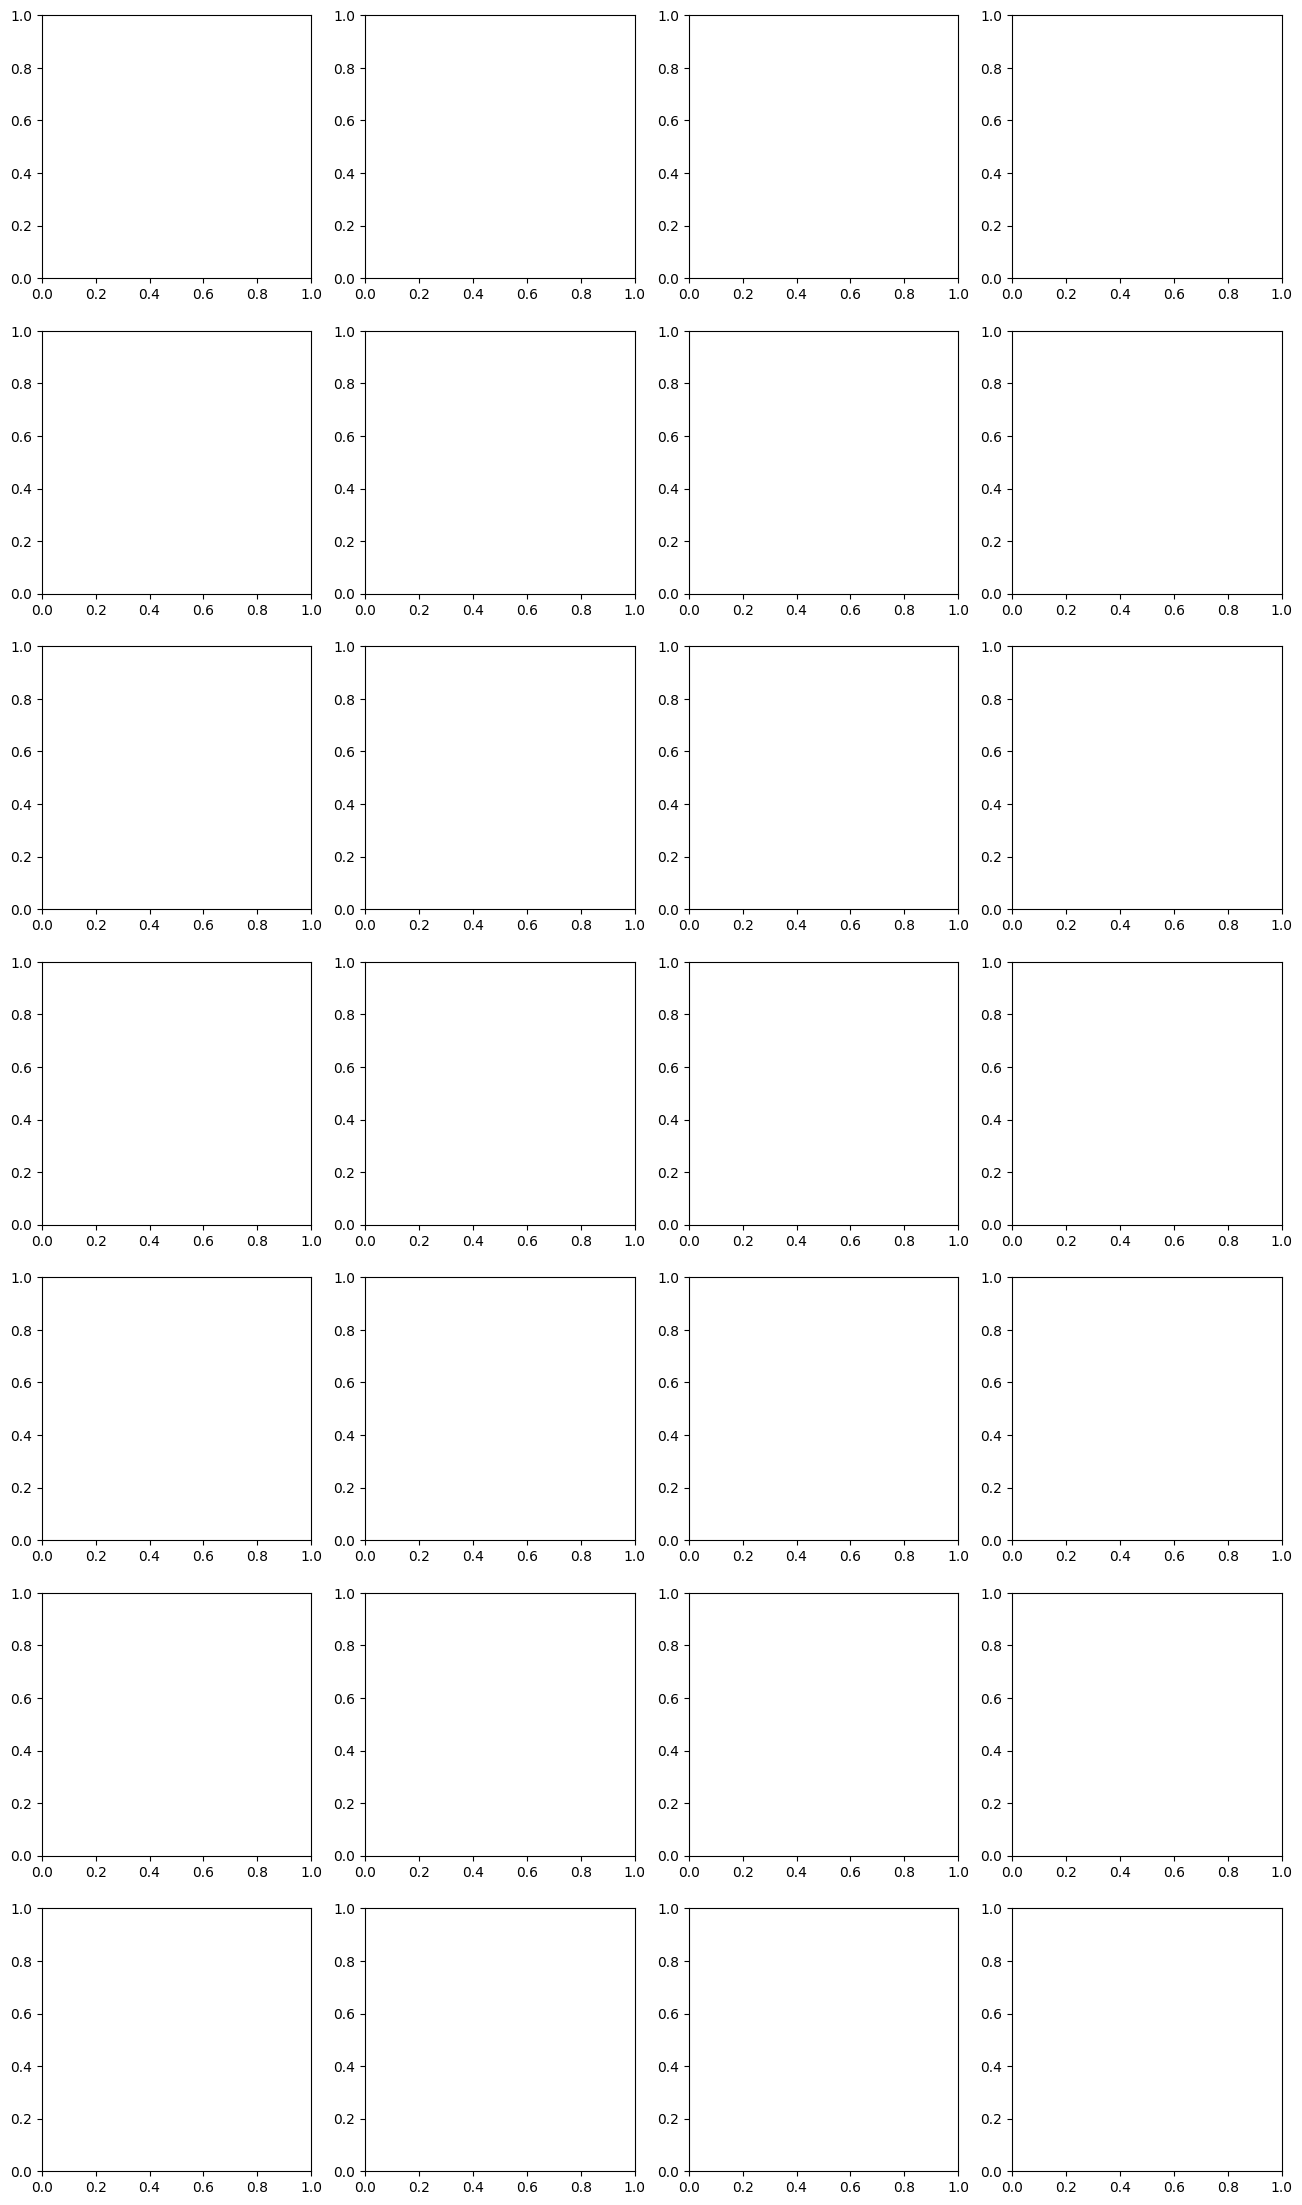

In [131]:
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Liste des modèles et de leurs prédictions
models = {
    "Linear Regression": y_pred_linear,
    "Random Forest Regressor": y_pred_rf,
    "Decision Tree Regressor": y_pred_dt,
    "KNeighbors Regressor": y_pred_knn,
    "XGB Regressor": y_pred_xgb,
    "RANSAC Regressor": y_pred_ransac,
    "Lasso": y_pred_lasso
}
# Création d'une figure pour les visualisations avec 4 colonnes
fig, axs = plt.subplots(len(models), 4, figsize=(16, len(models) * 4))

# Itération à travers chaque modèle
for i, (model_name, y_pred) in enumerate(models.items()):
    # Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Affichage du graphique de dispersion des valeurs prédites vs valeurs réelles
    axs[i, 0].scatter(y_test, y_pred, alpha=0.5)
    axs[i, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[i, 0].set_xlabel('Valeurs Réelles')
    axs[i, 0].set_ylabel('Prédictions')
    axs[i, 0].set_title(f'{model_name}: Valeurs Réelles vs Prédictions\nR²={r2:.3f}, RMSE={rmse:.3f}')

    # Affichage de la distribution des erreurs de prédiction
    errors = y_test - y_pred
    sns.histplot(errors, bins=30, kde=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel('Erreur de Prédiction')
    axs[i, 1].set_ylabel('Fréquence')
    axs[i, 1].set_title(f'{model_name}: Distribution des Erreurs de Prédiction')

    # Affichage de 2 colonnes vides pour laisser un espace
    axs[i, 2].axis('off')
    axs[i, 3].axis('off')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [212, 354]

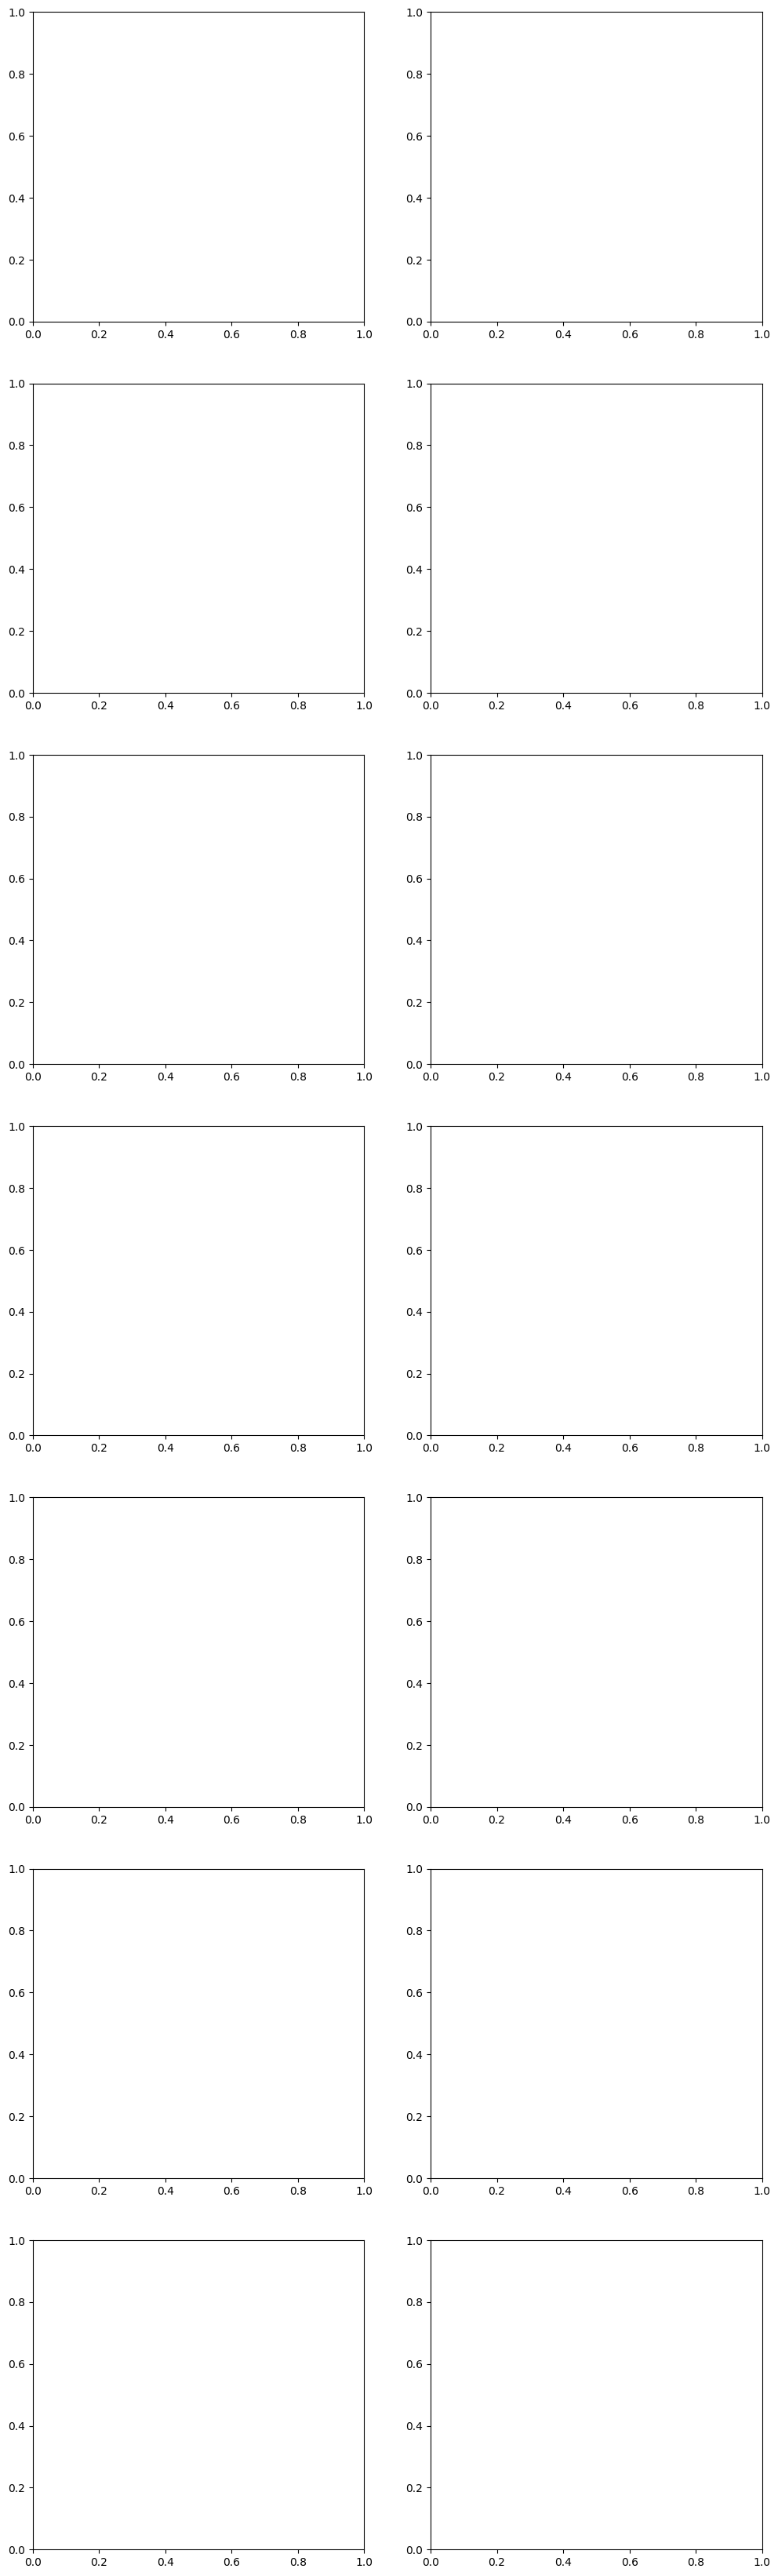

In [132]:
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Liste des modèles et de leurs prédictions
models = {
    "Linear Regression": y_pred_linear,
    "Random Forest Regressor": y_pred_rf,
    "Decision Tree Regressor": y_pred_dt,
    "KNeighbors Regressor": y_pred_knn,
    "XGB Regressor": y_pred_xgb,
    "RANSAC Regressor": y_pred_ransac,
    "Lasso": y_pred_lasso
}

# Création d'une figure pour les visualisations
fig, axs = plt.subplots(len(models), 2, figsize=(12, len(models) * 6))

# Itération à travers chaque modèle
for i, (model_name, y_pred) in enumerate(models.items()):
    # Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Affichage du graphique de dispersion des valeurs prédites vs valeurs réelles
    axs[i, 0].scatter(y_test, y_pred, alpha=0.5)
    axs[i, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[i, 0].set_xlabel('Valeurs Réelles')
    axs[i, 0].set_ylabel('Prédictions')
    axs[i, 0].set_title(f'{model_name}: Valeurs Réelles vs Prédictions\nR²={r2:.3f}, RMSE={rmse:.3f}')

    # Affichage de la distribution des erreurs de prédiction
    errors = y_test - y_pred
    sns.histplot(errors, bins=30, kde=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel('Erreur de Prédiction')
    axs[i, 1].set_ylabel('Fréquence')
    axs[i, 1].set_title(f'{model_name}: Distribution des Erreurs de Prédiction')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


In [133]:
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supposons que "y_test" sont les valeurs réelles et "y_pred" sont les prédictions du modèle
# Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Coefficient de Détermination (R²): {r2}")
print(f"Erreur Quadratique Moyenne (RMSE): {rmse}")

# Visualisation des résultats
# Graphique de dispersion des valeurs prédites vs valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.show()

# Visualisation de l'erreur de prédiction
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Erreur de Prédiction')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs de Prédiction')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [212, 354]

In [134]:
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(y_test, y_pred, model_name, results):
    """
    Évalue les performances d'un modèle de machine learning et enregistre les résultats.
    
    Paramètres :
    y_test (array-like) : Valeurs réelles
    y_pred (array-like) : Prédictions du modèle
    model_name (str) : Nom du modèle
    results (dict) : Dictionnaire pour stocker les résultats
    """
    # Calcul du coefficient de détermination (R²) et de l'erreur quadratique moyenne (RMSE)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Stockage des résultats
    results[model_name] = {'R²': r2, 'RMSE': rmse}

    # Affichage des résultats sous forme de graphique de dispersion des valeurs prédites vs valeurs réelles
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title(f'{model_name} - Valeurs Réelles vs Prédictions')
    plt.show()

    # Affichage de la distribution des erreurs de prédiction
    errors = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(errors, bins=30, kde=True)
    plt.xlabel('Erreur de Prédiction')
    plt.ylabel('Fréquence')
    plt.title(f'{model_name} - Distribution des Erreurs de Prédiction')
    plt.show()

# Exemple d'utilisation de la fonction avec différents modèles
# Supposons que "y_test" est le même pour tous les modèles
y_test = [valeurs réelles]  # Remplacez par vos données réelles

# Prédictions de différents modèles (exemple fictif)
y_pred_lr = [prédictions de régression linéaire]
y_pred_rf = [prédictions de forêt aléatoire]
y_pred_xgb = [prédictions de XGBoost]

# Dictionnaire pour stocker les résultats
results = {}

# Évaluation de chaque modèle
evaluate_model(y_test, y_pred_lr, 'Régression Linéaire', results)
evaluate_model(y_test, y_pred_rf, 'Forêt d\'arbres décisionnels (Random Forest)', results)
evaluate_model(y_test, y_pred_xgb, 'XGBoost', results)

# Conversion des résultats en DataFrame et affichage sous forme de tableau
results_df = pd.DataFrame(results).T
print(results_df)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1659528647.py, line 43)

In [135]:
def get_best_model(x_test, y_test, models, **params):
    best_model = None
    best_accuracy = -1
    for name, model in models.items():
        # Si des paramètres sont fournis, les utiliser pour régler le modèle
        if params.get(name):
            model.set_params(**params[name])
        accuracy = model.score(x_test, y_test)
        print(f"{name} - Test Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
    print(f"\nThe best model is: {best_model.__class__.__name__} with Test Accuracy: {best_accuracy}")
    return best_model

# Paramètres pour chaque modèle (vide pour l'exemple)
model_params = {
    'Linear Regression': {},
    'Decision Tree Regressor': {'min_samples_split': 2},
    'Ridge Regression': {'alpha': 1.0},
    'Random Forest Regressor': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200},
    'KNeighbors Regressor': {},
    'XGBoost': {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10, 'n_estimators': 100},
    'RANSAC Regressor': {},
    'Lasso': {'alpha': 0.1}
}

# Utilisation de la fonction pour obtenir le meilleur modèle avec les paramètres spécifiés
best_model = get_best_model(x_test, y_test, {
    'Linear Regression': linear,
    'Decision Tree Regressor': dt,
    'Ridge Regression': ridge,
    'Random Forest Regressor': rf,
    'KNeighbors Regressor': knn,
    'XGBoost': xgb,
    'RANSAC Regressor': ransac,
    'Lasso': lasso
}, **model_params)


Linear Regression - Test Accuracy: 0.8792666056821727
Decision Tree Regressor - Test Accuracy: 0.9933695489363835
Ridge Regression - Test Accuracy: 0.8794089428913221
Random Forest Regressor - Test Accuracy: 0.9814978286516818
KNeighbors Regressor - Test Accuracy: 0.7992130217640042
XGBoost - Test Accuracy: 0.8707182098408669
RANSAC Regressor - Test Accuracy: 0.7345250939519326
Lasso - Test Accuracy: 0.8754152593428339

The best model is: DecisionTreeRegressor with Test Accuracy: 0.9933695489363835


###  Visualizing Results

In [136]:
def predict_price(x_test,y_test,lr,col_mode=None):
    predict_lr_X = lr.predict(x_test)
    df_model=pd.DataFrame()
    if col_mode=="all":
        df_model = x_test.copy()
    df_model['Price'] = y_test
    df_model['predict_price'] = predict_lr_X.round(0)
    # df_model = df_model.iloc[:len(df_model)]
    return df_model

In [137]:
def show_predict_price(df_model, mode='point', y_test=None, pred=None):
    if mode == 'point':
        try: 
            fig, ax = plt.subplots(figsize=(12, 6))
            sns.lineplot(data=df_model[['Price', 'predict_price']].head(70), ax=ax, marker='o', markersize=7)
            plt.show()
        except Exception as e:
            print(f' Error : {e}')
    elif mode == 'scatter':
        if y_test is None or pred is None:
            print("Please provide y_test and pred for scatter plot.")
            return
        fig = plt.figure(figsize=(8, 7))
        sns.scatterplot(y_test, pred)
        fig.suptitle('Prediction using Polynomial', fontsize=18, fontweight='bold')
        plt.xlabel("Actual")
        plt.ylabel("Prediction")
        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()
    elif mode == 'compare':
        if y_test is None or pred is None:
            print("Please provide y_test and pred for comparison plot.")
            return
        plt.scatter(y_test, pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs. Predicted')
        plt.show()
    elif mode == 'residuals':
        if y_test is None or pred is None:
            print("Please provide y_test and pred for residuals plot.")
            return
        residuals = y_test - pred
        plt.scatter(pred, residuals)
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title('Residual plot')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.show()
    elif mode == 'hist':
        if y_test is None or pred is None:
            print("Please provide y_test and pred for histogram plot.")
            return
        plt.hist([y_test, pred], bins=10, label=['Actual', 'Predicted'])
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title('Histogram of Actual and Predicted Values')
        plt.legend()
        plt.show()
    elif mode == 'box':
        if y_test is None or pred is None:
            print("Please provide y_test and pred for box plot.")
            return
        plt.boxplot([y_test, pred], labels=['Actual', 'Predicted'])
        plt.ylabel('Value')
        plt.title('Boxplot of Actual and Predicted Values')
        plt.show()
    else:
        print("Invalid mode. Please choose from 'point', 'scatter', 'compare', 'residuals', 'hist', or 'box'.")


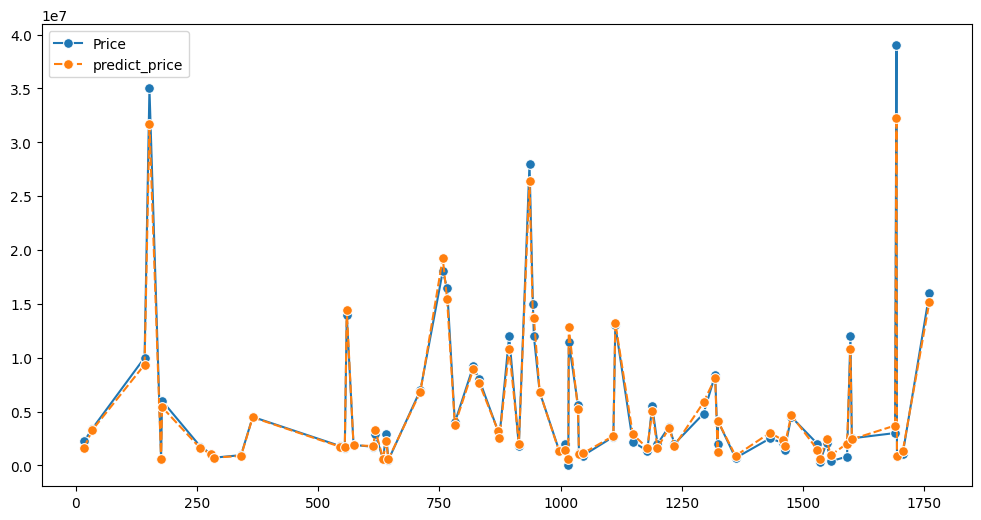

In [138]:
df_model=predict_price(x_test,y_test,rf,col_mode="all") 
show_predict_price(df_model=df_model, y_test=y_test, pred=df_model['predict_price'], mode='point')


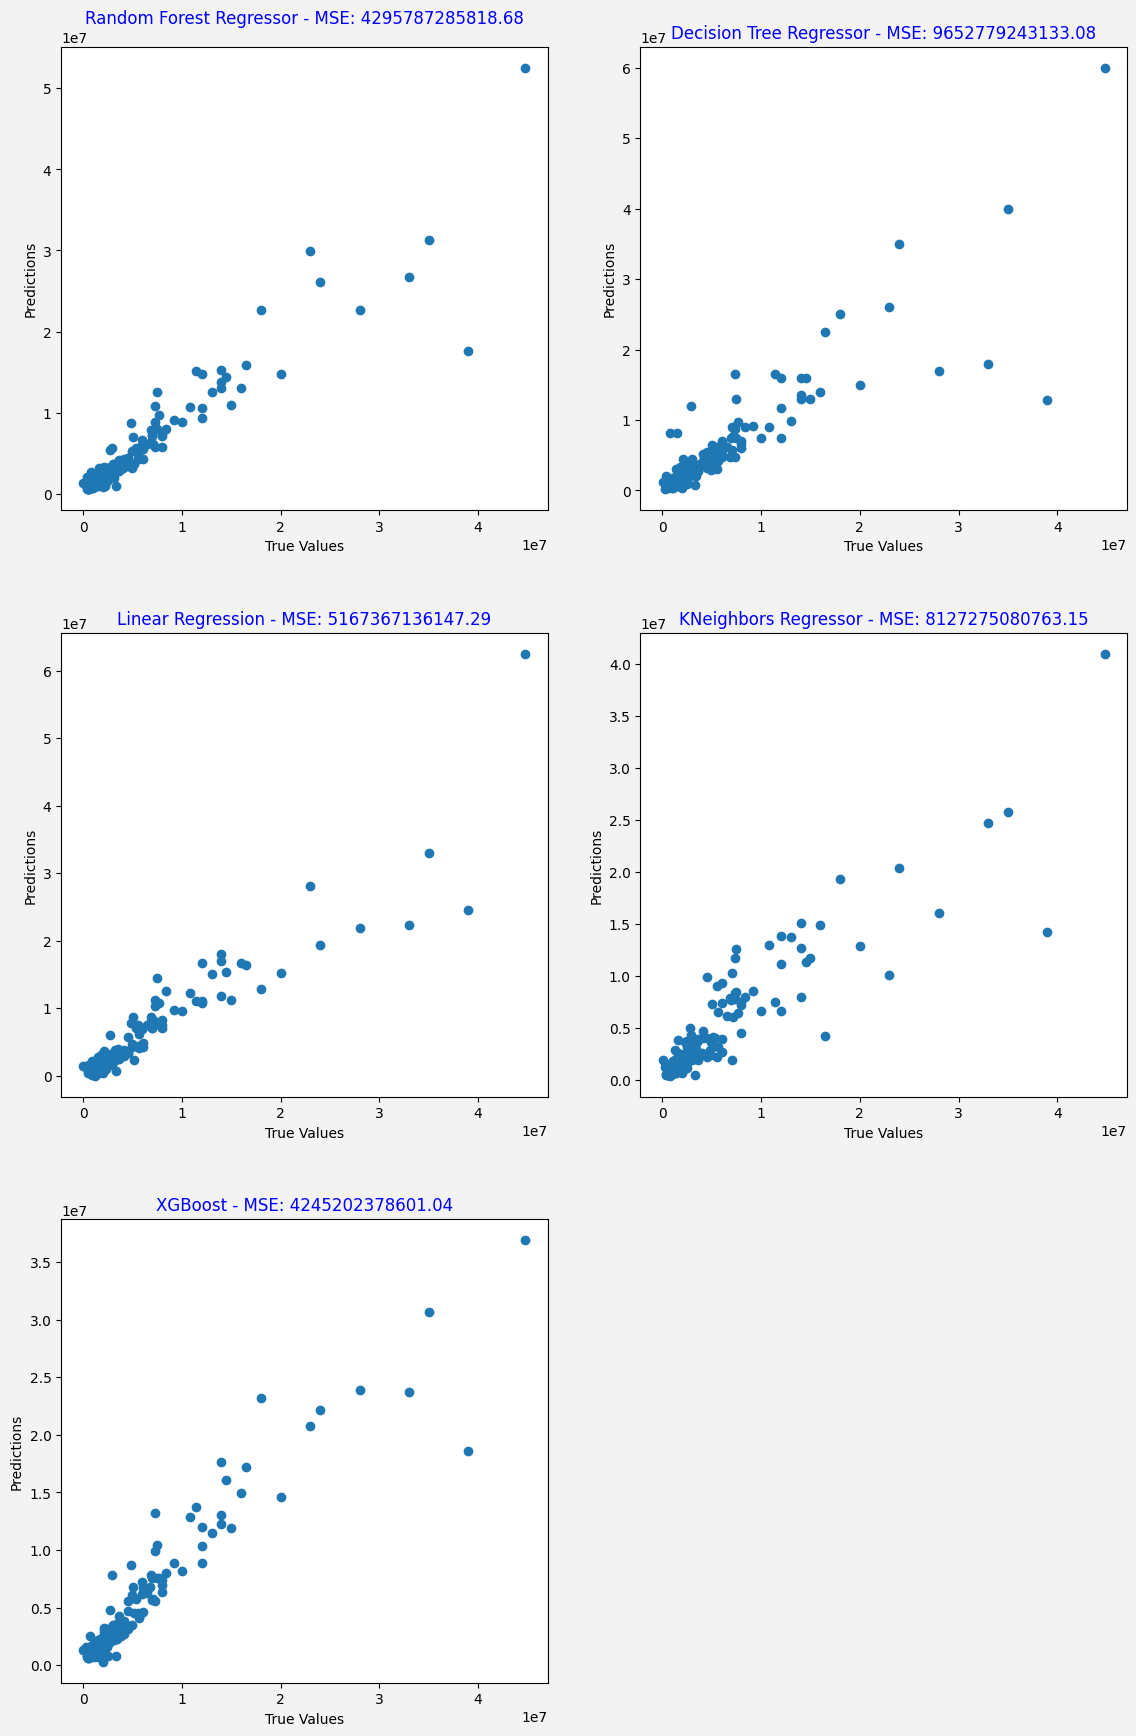

In [139]:
def confmatplot(modeldict, df_train, df_test, target_train, target_test):
    num_models = len(modeldict)
    figcolnumber = 2  # Two columns per row
    figrownumber = ceil(num_models / figcolnumber)
    fig = plt.figure(figsize=(12, 6 * figrownumber))
    fig.set_facecolor("#F3F3F3")
    for idx, (name, model_info) in enumerate(modeldict.items()):
        plt.subplot(figrownumber, figcolnumber, idx + 1)
        model = model_info['model']
        trained_model = model.fit(df_train[model_info['columns']], target_train)
        predictions = trained_model.predict(df_test[model_info['columns']])
        mse = mean_squared_error(target_test, predictions)
        plt.scatter(target_test, predictions)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(f'{name} - MSE: {mse:.2f}', color="b")
    
    # Tight layout with more space between subplots
    plt.tight_layout(pad=3.0, h_pad=3.0)

# Define the columns to use
cols = ['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state', 'Age']

# Define models with their respective regressors
models = {
    'Random Forest Regressor': {'model': RandomForestRegressor(), 'columns': cols},
    'Decision Tree Regressor': {'model': DecisionTreeRegressor(), 'columns': cols},
    'Linear Regression': {'model': LinearRegression(), 'columns': cols},
    'KNeighbors Regressor': {'model': KNeighborsRegressor(), 'columns': cols},
    'XGBoost': {'model': XGBRegressor(), 'columns': cols},
    # Add more models here as needed
}

# Call the function to plot predictions against true values
confmatplot(modeldict=models, df_train=x_train, df_test=x_test, 
            target_train=y_train, target_test=y_test)


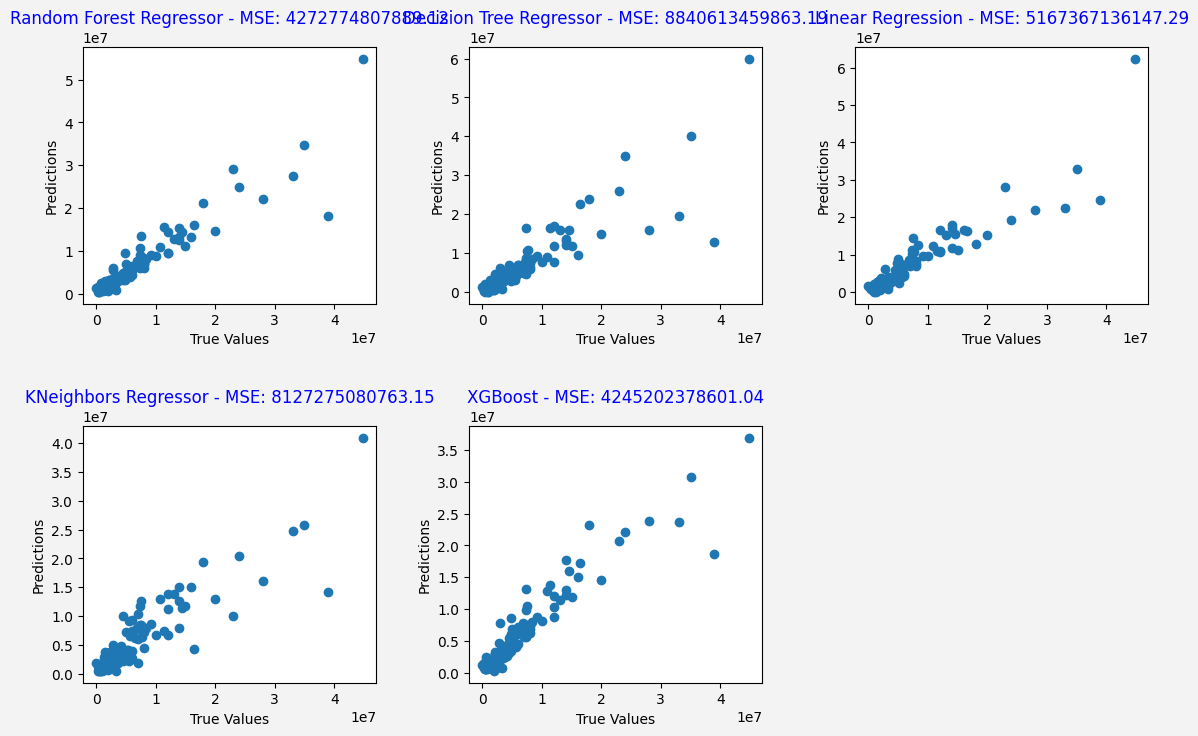

In [140]:

def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        model = modeldict[name]['model']
        trained_model = model.fit(df_train[modeldict[name]['columns']], target_train)
        predictions = trained_model.predict(df_test[modeldict[name]['columns']])
        mse = mean_squared_error(target_test, predictions)
        plt.scatter(target_test, predictions)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(f'{name} - MSE: {mse:.2f}', color="b")
    
    # Tight layout with more space between subplots
    plt.tight_layout(pad=3.0, h_pad=3.0)

# Define the columns to use
cols = ['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state', 'Age']

# Define models with their respective regressors
models = {
    'Random Forest Regressor': {'model': RandomForestRegressor(), 'columns': cols},
    'Decision Tree Regressor': {'model': DecisionTreeRegressor(), 'columns': cols},
    'Linear Regression': {'model': LinearRegression(), 'columns': cols},
    'KNeighbors Regressor': {'model': KNeighborsRegressor(), 'columns': cols},
    'XGBoost': {'model': XGBRegressor(), 'columns': cols},
    # Add more models here as needed
    # 'Your_New_Model': {'model': YourRegressor(), 'columns': cols}
}

# Call the function to plot predictions against true values
confmatplot(modeldict=models, df_train=x_train, df_test=x_test, 
            target_train=y_train, target_test=y_test, figcolnumber=3)


In [141]:
# Define the columns to use
cols = ['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state', 'Age']

# Function to generate model report
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    mse = mean_squared_error(testing_y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(testing_y, predictions)

    df = pd.DataFrame({"Model": [name],
                       "Mean Squared Error": [mse],
                       "Root Mean Squared Error": [rmse],
                       "R² Score": [r2]})
    return df


# DataFrame to store model performances on training dataset
model_performances_train = pd.DataFrame()

# Calculate model performances on training dataset
for name in models:
    if name == 'Logistic (SMOTE)':
        df = model_report(models[name]['model'], x_smote[models[name]['columns']], x_test[models[name]['columns']],
                          y_smote, y_test, name)
    else:
        df = model_report(models[name]['model'], x_train[models[name]['columns']], x_test[models[name]['columns']],
                          y_train, y_test, name)
    model_performances_train = pd.concat([model_performances_train, df], ignore_index=True)

# Create table using Plotly
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)


### Save model

In [ ]:
# Enregistrer le modèle dans un fichier 
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

##  Model Deployement

In [1]:
import pickle
import pandas as pd
with open('../models/label_encoders_and_scaler.pkl', 'rb') as f:
    label_encoders, scaler = pickle.load(f)
model = pickle.load(open('../models/random_forest_model.pkl', 'rb'))

In [2]:
def preprocess_new_data(df, df_new, label_encoders=None, scaler=None):
    try:
        if label_encoders:
            for col, le in label_encoders.items():
                # Combine original data and new data to ensure all labels are seen
                combined_data = pd.concat([df[col], df_new[col]])
                le.fit(combined_data)
                df[col] = le.transform(df[col])
    except Exception as e:
        print(f'Error: {e}')
        
    if scaler:
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns 
        df[numeric_cols] = scaler.transform(df[numeric_cols])
        
    if label_encoders:
        print(label_encoders.items())
        
    return df

In [3]:
# Appartements	Californie	1547620.0	Casablanca	94.0	4.0	3.0	2.0	4.0	Non Specifique	Non Specifique
cust = {
    'Type': ['Appartements'],
    'Localisation': ['Californie'],
    'City': ['Casablanca'],
    'Floor': [6.0],
    'Area': [244.0],
    'Rooms': [4.0],
    'Bedrooms':[ 3.0],
    'Bathrooms': [4.0],
    'Current_state': ['Bon état'],
    'Age': ['Non Specifique'],
}

In [4]:
df_new = pd.DataFrame(cust, index=[0])
display(df_new)
df_new = df_new[['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms','Bathrooms', 'Floor', 'Current_state', 'Age']]
cust_transformed = preprocess_new_data(df_new, df_new, label_encoders=label_encoders, scaler=scaler)
display(cust_transformed)

,Type,Localisation,City,Floor,Area,Rooms,Bedrooms,Bathrooms,Current_state,Age
0,Appartements,Californie,Casablanca,6.0,244.0,4.0,3.0,4.0,Bon état,Non Specifique


dict_items([('Type', LabelEncoder()), ('Localisation', LabelEncoder()), ('City', LabelEncoder()), ('Current_state', LabelEncoder()), ('Age', LabelEncoder())])


,Type,Localisation,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
0,0,0,0,-0.073874,-0.162693,0.068434,1.514311,1.99799,0,0


In [5]:
prediction = model.predict(cust_transformed)
print(prediction)

[4613303.2]


In [14]:
cust = pd.read_csv('../data/final_data.csv')
cust= cust[cust['Type']=='Villas']
cust=cust.sample(10)
display(cust)

,Type,Localisation,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
586,Villas,Californie,19000000.0,Casablanca,1000.0,5.0,4.0,5.0,0.0,Non Specifique,Non Specifique
837,Villas,Casablanca,7500000.0,Casablanca,325.0,6.0,3.0,0.0,0.0,Non Specifique,Non Specifique
1760,Villas,Californie,7200000.0,Casablanca,450.0,5.0,4.0,5.0,0.0,Non Specifique,Non Specifique
55,Villas,Les Crêtes,9000000.0,Casablanca,800.0,5.0,4.0,3.0,0.0,Bon état,Non Specifique
1574,Villas,Ain Diab,7700000.0,Casablanca,574.0,5.0,4.0,4.0,0.0,Non Specifique,Non Specifique
184,Villas,Oasis,11600000.0,Casablanca,1058.0,12.0,6.0,4.0,0.0,Non Specifique,Non Specifique
117,Villas,CIL (Hay Salam),10900000.0,Casablanca,565.0,5.0,4.0,3.0,0.0,Non Specifique,Non Specifique
1151,Villas,Casablanca,8800000.0,Casablanca,525.0,8.0,4.0,4.0,0.0,Non Specifique,Non Specifique
1103,Villas,CIL (Hay Salam),5000000.0,Casablanca,240.0,4.0,3.0,4.0,0.0,Non Specifique,Non Specifique
664,Villas,Anfa,14000000.0,Casablanca,1068.0,7.0,6.0,3.0,0.0,Non Specifique,Non Specifique


In [15]:
y = cust ['Price']

In [16]:
display(cust['Price'])
cust.drop(columns=['Price'],inplace=True)
cust_transformed = preprocess_new_data(cust, cust, label_encoders=label_encoders, scaler=scaler)
cust_transformed 

586     19000000.0
837      7500000.0
1760     7200000.0
55       9000000.0
1574     7700000.0
184     11600000.0
117     10900000.0
1151     8800000.0
1103     5000000.0
664     14000000.0
Name: Price, dtype: float64

dict_items([('Type', LabelEncoder()), ('Localisation', LabelEncoder()), ('City', LabelEncoder()), ('Current_state', LabelEncoder()), ('Age', LabelEncoder())])


,Type,Localisation,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
586,0,3,0,1.686622,0.265497,0.814455,2.365178,-0.818012,1,0
837,0,4,0,0.114751,0.693686,0.068434,-1.889155,-0.818012,1,0
1760,0,3,0,0.405838,0.265497,0.814455,2.365178,-0.818012,1,0
55,0,5,0,1.220883,0.265497,0.814455,0.663445,-0.818012,0,0
1574,0,0,0,0.694597,0.265497,0.814455,1.514311,-0.818012,1,0
184,0,6,0,1.821687,3.262823,2.306496,1.514311,-0.818012,1,0
117,0,2,0,0.673639,0.265497,0.814455,0.663445,-0.818012,1,0
1151,0,4,0,0.580491,1.550065,0.814455,1.514311,-0.818012,1,0
1103,0,2,0,-0.083188,-0.162693,0.068434,1.514311,-0.818012,1,0
664,0,1,0,1.844974,1.121876,2.306496,0.663445,-0.818012,1,0


In [17]:
prediction = model.predict(cust_transformed)
print(prediction)

[21370750.     6757323.     7384869.36  12545548.6    6850723.6
 15582085.725  6402048.6    7722432.05   4619256.    16577291.725]


In [18]:
import matplotlib.pyplot as plt
import numpy as np

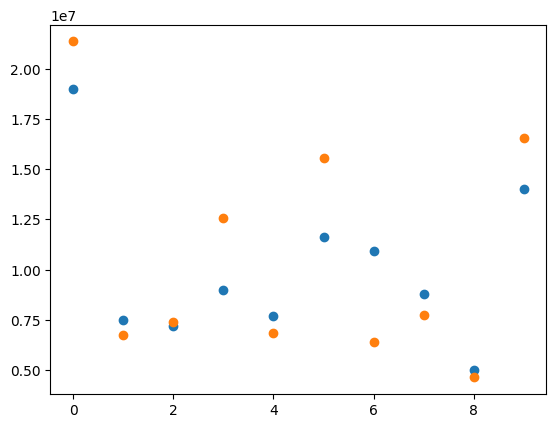

In [19]:
plt.scatter(np.arange(0,y.shape[0]).reshape(y.shape), y)
plt.scatter(np.arange(0,y.shape[0]).reshape(y.shape), prediction)

In [100]:
cust = {
    'Type': ['Appartements'],
    'Localisation': ['Californie'],
    'City': ['lllsls'],
    'Floor': [6.0],
    'Area': [244.0],
    'Rooms': [4.0],
    'Bedrooms':[ 3.0],
    'Bathrooms': [4.0],
    'Current_state': ['Bon état'],
    'Age': ['Non Specifique'],
}

In [6]:
# df_new = pd.DataFrame(cust, index=[0])
df = pd.read_csv('../data/final_data.csv')
df = df.sample(10)
# df.drop(columns=['Price'],inplace=True)

In [7]:
df.sample()
# 407	Appartements	Maârif Extension	1550000.0	Casablanca	130.0	4.0	3.0	2.0	2.0	Non Specifique	Non Specifique

,Type,Localisation,Price,City,Area,Rooms,Bedrooms,Bathrooms,Floor,Current_state,Age
407,Appartements,Maârif Extension,1550000.0,Casablanca,130.0,4.0,3.0,2.0,2.0,Non Specifique,Non Specifique


In [103]:
df_new.sample()

,Type,Localisation,City,Floor,Area,Rooms,Bedrooms,Bathrooms,Current_state,Age
0,Appartements,Californie,lllsls,6.0,244.0,4.0,3.0,4.0,Bon état,Non Specifique


In [107]:

# Define the order of feature names
feature_order = ['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state', 'Age']

# Reorder the columns of df to match the required order
df = df[feature_order]
df_new =df[df_new]
df_new = pd.concat([df_new, df], ignore_index=True)
cust_transformed = preprocess_new_data(df_new, df_new, label_encoders=label_encoders, scaler=scaler)
prediction = model.predict(cust_transformed)
predicted_price = prediction[0].round(2)
predicted_price = predicted_price[:-10]
predicted_price

dict_items([('Type', LabelEncoder()), ('Localisation', LabelEncoder()), ('City', LabelEncoder()), ('Current_state', LabelEncoder()), ('Age', LabelEncoder())])


IndexError: invalid index to scalar variable.

In [112]:
import pandas as pd
import pickle

# Define the customer data
cust = {
    'Type': ['Appartements'],
    'Localisation': ['Californie'],
    'City': ['lllsls'],
    'Floor': [6.0],
    'Area': [244.0],
    'Rooms': [4.0],
    'Bedrooms':[ 3.0],
    'Bathrooms': [4.0],
    'Current_state': ['Bon état'],
    'Age': ['Non Specifique'],
}

# Create DataFrame for the customer data
df_new = pd.DataFrame(cust)

# Read the final data
df = pd.read_csv('../data/final_data.csv')

# Sample 10 rows from the final data
df = df.sample(10)

# Drop the 'Price' column from the sampled data
df.drop(columns=['Price'], inplace=True)

# Define the order of feature names
feature_order = ['Type', 'Localisation', 'City', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Current_state', 'Age']

# Reorder the columns of df to match the required order
df = df[feature_order]
df_new = df_new[feature_order]

# Concatenate the customer data and the sampled data
df_exponcatenated = pd.concat([df_new, df], ignore_index=True)

# Preprocess the concatenated data
concatenated_transformed = preprocess_new_data(df_exponcatenated, df_exponcatenated, label_encoders=label_encoders, scaler=scaler)

# Make prediction
prediction = model.predict(concatenated_transformed)

# Round the predicted price to two decimal places
predicted_price = prediction[0].round(2)

# Output the predicted price
predicted_price


dict_items([('Type', LabelEncoder()), ('Localisation', LabelEncoder()), ('City', LabelEncoder()), ('Current_state', LabelEncoder()), ('Age', LabelEncoder())])


4622303.2